<a id="top"></a>
# <font color='#0017F3'>Team <font color='#008BB9'>RM5 <font color='#00BAA2'>Classification <font color='#00C77C'>Predict <font color='#00E88B'>Notebook</font>
### <font color='#082C64'>Kaggle Submission: Team_RM5_SigmoidFreuds <sup>*</sup></font>
---
<img src="https://github.com/Lizette95/classification-predict-streamlit-template/blob/master/resources/imgs/rm5_banner.png?raw=true" align="left">  

**Team Members:** Abednego Pakaree, Iman Mokwena, Lizette Loubser, Omphile Louw, Refiloe Elvis Phipa, Silindokuhle Kubheka    
**Supervisor:** Ridha Moosa

* [Notebook repo](https://github.com/Lizette95/Team_RM5_ClassificationPredict_Notebook)
* [Streamlit repo](https://github.com/Lizette95/classification-predict-streamlit-template)
* [Trello board](https://trello.com/b/pFKnwtGF/classificationteamrm5) 

_(Note: All outputs are displayed. This notebook runs for about 15 minutes from start to end.)_

### Table of Contents
---
1. [Introduction](#intro)
 * Background
 * Problem Statement
---
2. [Load Dependencies](#imports)
---
3. [Data Cleaning](#cleaning)
---
4. [Exploratory Data Analysis](#EDA)
 * Datasets and Variables
 * Data Summary
 * Label
 * WordClouds
 * Sentiment Analysis
 * Subjectivity
 * Character and Word Frequencies
 * URL Analysis
 * Hashtag and Mention Analysis
 * Retweet Analysis
---
5. [Data Preprocessing](#preprocessing)
 * Feature Engineering
 * Lemmatisation
 * Split Training and Validation Sets
 * Feature Extraction
---
6. [Modelling](#modelling)
 * Multinomial Naive Bayes
 * Logistic Regression
 * Random Forest Classifier
 * Support Vector Classifier
 * Linear SVC
 * K Neighbours Classifier
 * Decision Tree Classifier
 * AdaBoost Classifier
---
7. [Performance Evaluation](#evaluation)
 * Performance Metrics of Best Models
 * Hyperparameter Tuning of Best Models
---
8. [Model Analysis](#analysis)
 * Performance Metrics
 * ROC Curves and AUC
 * Results
---
9. [Conclusion](#conclusion)
---
10. [Save Output](#save)
---

<a id="intro"></a>
## 1. Introduction  

### Background

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product or service may be received.

Companies require access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies. We can implement machine learning classification algorithms to solve this problem.

Machine learning is the study of computer algorithms that improve automatically through experience. It is a powerful branch of Artificial intelligence, dating as far back as 1952. Machine learning algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so.

Classification is a process of categorizing a given set of data into classes, It can be performed on both structured or unstructured data. The process starts with predicting the class of given data points. The classes are often referred to as target, label or categories.


### Problem Statement

Build a classification model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.


<a id="imports"></a>
## 2. Load Dependencies

In [23]:
# Link workspace to Comet experiment
!pip install comet_ml
from comet_ml import Experiment
experiment = Experiment(api_key="zNkJjcVKOMD5gKd05z6CwT4OD", project_name="team-rm5-sigmoidfreuds", workspace="lizette95")

In [24]:
# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')

# Install Prerequisites
import sys
import nltk
!{sys.executable} -m pip install bs4 lxml wordcloud scikit-learn scikit-plot
nltk.download('vader_lexicon')

# Exploratory Data Analysis
import re
import ast
import time
import nltk
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer

# Data Preprocessing
import string
from bs4 import BeautifulSoup
from collections import Counter
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from sklearn.utils import resample
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Classification Models
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Performance Evaluation
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from scikitplot.metrics import plot_roc, plot_confusion_matrix
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Display
%matplotlib inline
sns.set(font_scale=1)
sns.set_style("white")

<a id="cleaning"></a>
## 3. Data Cleaning

In [25]:
train_data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')
df_train = train_data.copy() #For EDA on raw data
df_test = test_data.copy()

In [26]:
train_data.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [27]:
test_data.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


We initially applied extensive cleaning steps to the data in order to remove noise that could influence the performance of our classification models. However, after testing multiple combinations of cleaning and preprocessing steps, our models showed better performance with minimal cleaning and preprocessing.

In [28]:
## Initial Cleaning
# contractions = {"ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "i'd": "I would", "i'd've": "I would have", "i'll": "I will", "i'll've": "I will have", "i'm": "I am", "i've": "I have", "isn't": "is not", "it'd": "it had", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have", "so's": "so is", "that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there had", "there'd've": "there would have", "there's": "there is", "they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we had", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'alls": "you alls", "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have", "you'd": "you had", "you'd've": "you would have", "you'll": "you you will", "you'll've": "you you will have", "you're": "you are", "you've": "you have"}
# contractions_re = re.compile('(%s)' % '|'.join(contractions.keys()))
# def expand_contractions(text):
#     """
#     Expand contractions using dictionary of contractions.
#     """
#     def replace(match):
#         return contractions[match.group(0)]
#     return contractions_re.sub(replace, text)

# punctuation = string.punctuation + '0123456789'
# stop_words = stopwords.words('english')
# stop_words.extend(['via','rt'])

# def clean(df):
#     """
#     Apply data cleaning steps to raw data.
#     """
#     df['lower'] = df['message'].str.lower()
#     df['html'] = df['lower'].apply(lambda x : BeautifulSoup(x, "lxml").text)
#     df['url'] = df['html'].apply(lambda x : re.sub(r'http\S+', 'weblink', x))
#     df['newlines'] = df['url'].apply(lambda x : x.replace('\n',' '))
#     df['mentions'] = df['newlines'].apply(lambda x : re.sub('@\w*', 'twittermention', x))
#     df['hashtags'] = df['mentions'].apply(lambda x : re.sub('#\w*', 'hashtag', x))
#     df['expand'] = df['hashtags'].apply(expand_contractions)
#     df['token'] = df['expand'].apply(TweetTokenizer().tokenize)
#     df['stopwords'] = df['token'].apply(lambda x : [word for word in x if word not in stop_words])
#     df['punc'] = df['stopwords'].apply(lambda x : [i for i in x if i not in punctuation])
#     df['dig'] = df['punc'].apply(lambda x: [i for i in x if i not in list(string.digits)])
#     df['final'] = df['dig'].apply(lambda x: [i for i in x if len(i) > 1])
#     return df['final']

# train_data['final'] = clean(train_data)
# test_data['final'] = clean(test_data)

In [29]:
# Final Cleaning
def sentiment_changer(df):
    """
    Change key words to reflect the general sentiment associated with it.
    """
    df['message'] = df['message'].apply(lambda x: x.replace('global', 'negative'))
    df['message'] = df['message'].apply(lambda x: x.replace('climate', 'positive'))
    df['message'] = df['message'].apply(lambda x: x.replace('MAGA', 'negative'))
    return df['message']

train_data['message'] = sentiment_changer(train_data)
test_data['message'] = sentiment_changer(test_data)

def clean(df):
    """
    Apply data cleaning steps to raw data.
    """
    df['token'] = df['message'].apply(TweetTokenizer().tokenize) ## first we tokenize
    df['punc'] = df['token'].apply(lambda x : [i for i in x if i not in string.punctuation])## remove punctuations
    df['dig'] = df['punc'].apply(lambda x: [i for i in x if i not in list(string.digits)]) ## remove digits
    df['final'] = df['dig'].apply(lambda x: [i for i in x if len(i) > 1]) ## remove all words with only 1 character
    return df['final']

train_data['final'] = clean(train_data)
test_data['final'] = clean(test_data)

<a id="EDA"></a>
## 4. Exploratory Data Analysis

### Datasets and Variables

**Datasets:**  
* train.csv: We will use this data to train our model.  
* test.csv: We will use this data to test our model.  

**Variables:**  
* sentiment: Sentiment of tweet  
* message: Tweet body  
* tweetid: Unique Twitter ID  

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:  

| Class | Description                                                                              |
| :----:|:-----------------------------------------------------------------------------------------|
| **2** |**News:** The tweet links to factual news about climate change                            |
| **1** |**Pro:** The tweet supports the belief of man-made climate change                         |
| **0** |**Neutral:** The tweet neither supports nor refutes the belief of man-made climate change |
| **-1**|**Anti:** The tweet does not believe in man-made climate change                           |

### Data Summary

In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
 3   token      15819 non-null  object
 4   punc       15819 non-null  object
 5   dig        15819 non-null  object
 6   final      15819 non-null  object
dtypes: int64(2), object(5)
memory usage: 865.2+ KB


In [31]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
 2   token    10546 non-null  object
 3   punc     10546 non-null  object
 4   dig      10546 non-null  object
 5   final    10546 non-null  object
dtypes: int64(1), object(5)
memory usage: 494.5+ KB


---
From the above summaries, we note that:
* None of our datasets have **missing values**
* There is no **sentiment** column in the test data, as this is the **label** that we want to predict
* There are **15 819** entries in our training dataset
* There are **10 546** entries in our testing dataset

### Label
We can examine the number of tweets that fall within a sentiment class and calculate the proportion of tweets that is represented by each class.

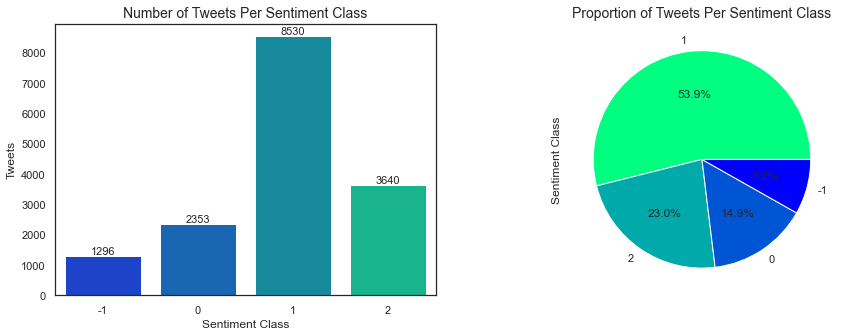

In [32]:
# Number of Tweets Per Sentiment Class
fig, axis = plt.subplots(ncols=2, figsize=(15, 5))

ax = sns.countplot(x='sentiment', data=train_data, palette='winter', ax=axis[0])
axis[0].set_title('Number of Tweets Per Sentiment Class',fontsize=14)
axis[0].set_xlabel('Sentiment Class')
axis[0].set_ylabel('Tweets')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')

train_data['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colormap='winter_r', ax=axis[1])
axis[1].set_title('Proportion of Tweets Per Sentiment Class',fontsize=14)
axis[1].set_ylabel('Sentiment Class')
    
plt.show()

The graphs reveal that our data is **imbalanced**, as more than 50% of the entries fall within sentiment class "1". We addressed this in the data preprocessing phase by resampling the data before building our models. However, resampling the data did not improve the performance of the models.

### WordClouds   
Wordclouds can be used to visualise text data, where the frequency of each word is proportional to the word size.

In [33]:
# Remove noise
stop_words = stopwords.words('english')
stop_words.extend(['via','rt'])

def remove_noise(tweet):
    """
    Remove noise from text data, such as newlines, punctuation, URLs and numbers.
    """
    new_tweet = BeautifulSoup(tweet, "lxml").text #HTML Decoding
    new_tweet = re.sub(r'http\S+', '', new_tweet) #Remove URLs
    new_tweet = new_tweet.lower() #Remove Capital Letters
    new_tweet = new_tweet.replace('\n',' ') #Remove Newlines
    new_tweet = re.sub('#(RT|rt)*', '', new_tweet) #Remove RT #s
    new_tweet = re.sub('@\w*', '', new_tweet) #Remove Mentions
    new_tweet = re.sub('\w*\d\w*','', new_tweet) #Remove Numbers/Words with Numbers
    new_tweet = re.sub('[^a-zA-z\s]', '', new_tweet) #Remove Punctuation
    new_tweet = ' '.join(word for word in new_tweet.split() if word not in stop_words) #Remove Stopwords
    return new_tweet

df_train['noise'] = df_train['message'].apply(remove_noise)
df_test['noise'] = df_test['message'].apply(remove_noise)

In [34]:
# Make Wordclouds
def wc(df):
    """
    Join words to create wordclouds.
    """
    words = ''
    for i in df:  
        words += i+" "
    return words
# Training Set
train_words = wc(df_train['noise'])
train_wordcloud = WordCloud(width=1500, height=700, background_color='white', colormap='winter', min_font_size=10).generate(train_words)
# Testing Set
test_words = wc(df_test['noise'])
test_wordcloud = WordCloud(width=1500, height=700, background_color='white', colormap='winter_r', min_font_size=10).generate(test_words)

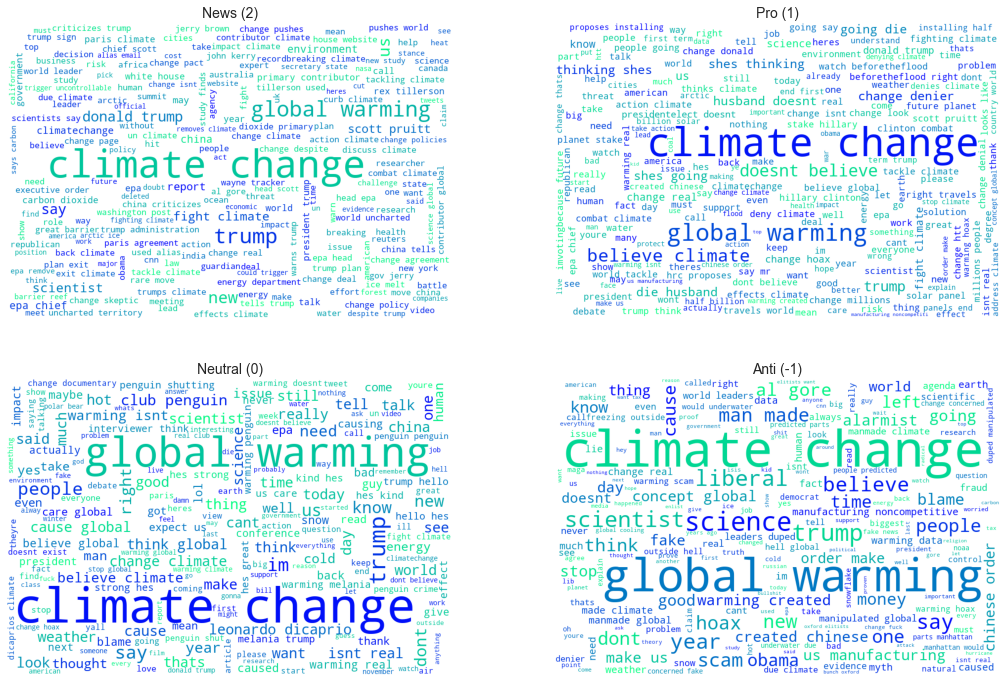

In [35]:
# Wordcloud Per Sentiment Class
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

news = wc(df_train['noise'][df_train['sentiment']==2])
news_wordcloud = WordCloud(width=900, height=600, background_color='white', colormap='winter').generate(news)
axis[0, 0].imshow(news_wordcloud)
axis[0, 0].set_title('News (2)',fontsize=14)
axis[0, 0].axis("off") 

neutral = wc(df_train['noise'][df_train['sentiment']==0])
neutral_wordcloud = WordCloud(width=900, height=600, background_color='white', colormap='winter', min_font_size=10).generate(neutral)
axis[1, 0].imshow(neutral_wordcloud)
axis[1, 0].set_title('Neutral (0)',fontsize=14)
axis[1, 0].axis("off") 

pro = wc(df_train['noise'][df_train['sentiment']==1])
pro_wordcloud = WordCloud(width=900, height=600, background_color='white', colormap='winter', min_font_size=10).generate(pro)
axis[0, 1].imshow(pro_wordcloud)
axis[0, 1].set_title('Pro (1)',fontsize=14)
axis[0, 1].axis("off") 

anti = wc(df_train['noise'][df_train['sentiment']==-1])
anti_wordcloud = WordCloud(width=900, height=600, background_color='white', colormap='winter', min_font_size=10).generate(anti)
axis[1, 1].imshow(anti_wordcloud)
axis[1, 1].set_title('Anti (-1)',fontsize=14)
axis[1, 1].axis("off") 

plt.show()

From the above wordclouds, we can see that the terms "climate change" and "global warming" occur frequently in all four sentiment classes. We can remove them during the data preprocessing phase, as these were most likely the terms that were used to identify and scrape tweets pertaining to climate change.

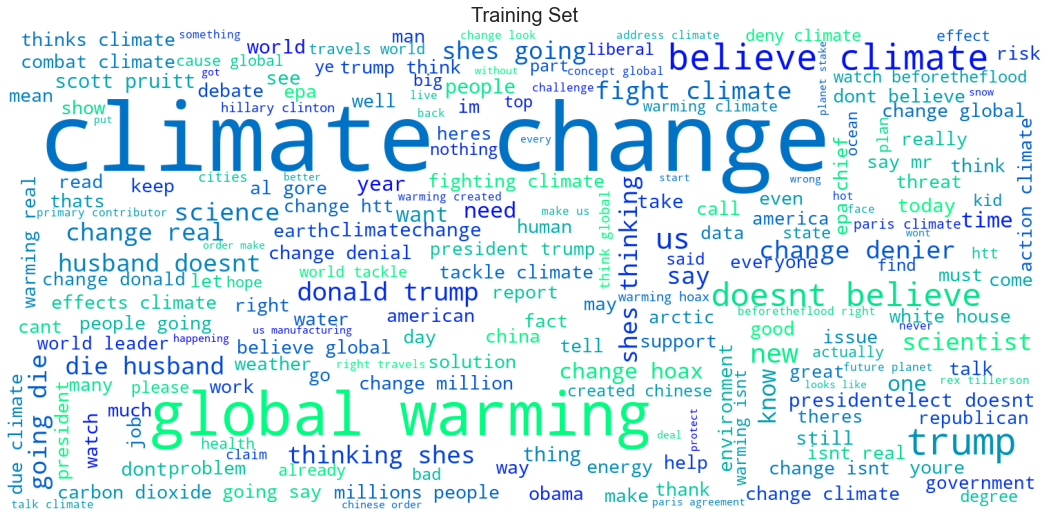

In [36]:
# Wordcloud for Training Data
plt.figure(figsize = (15, 7), facecolor = None) 
plt.title("Training Set",fontsize=20)
plt.imshow(train_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

plt.show() 

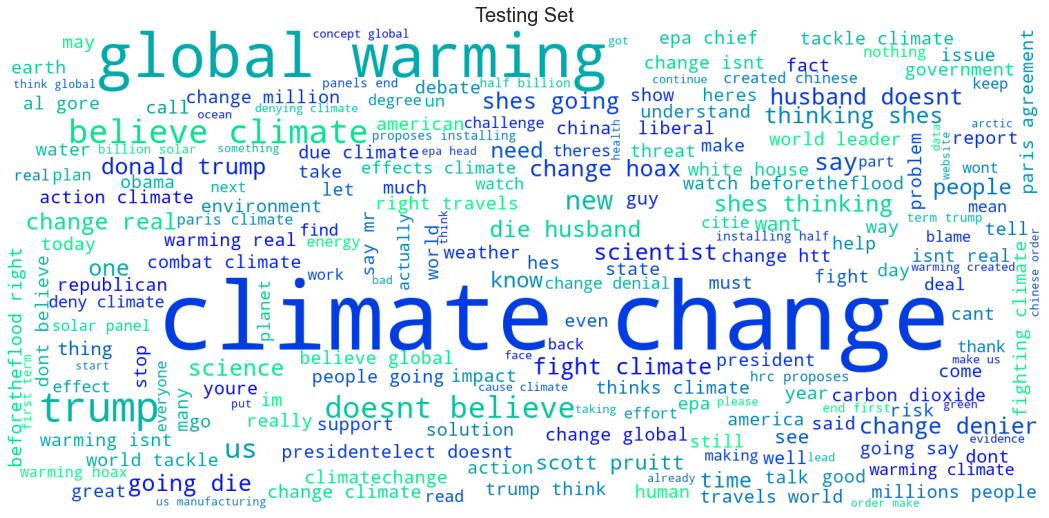

In [37]:
# Wordcloud for Testing Data
plt.figure(figsize = (15, 7), facecolor = None) 
plt.title("Testing Set",fontsize=20)
plt.imshow(test_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

plt.show() 

### Sentiment Analysis
As part of the problem statement, we thought that it would be interesting to identify how each of the sentiment classes express themselves. This can give insights into whether classes express themselves with cynicism, positivity or neither of the two. 

It would be reasonable to assume that Pro-class tweets would express negative sentiments because global warming is not a positive conversation topic. Pro Tweets believe in something negative and could express their belief with a level of cynicism or negativity.

In [38]:
df1_train = pd.read_csv('Data/train.csv')

drop1 = df1_train.drop_duplicates(['message', 'sentiment'])['tweetid'].values
drop2 = df1_train.drop_duplicates(['message'])['tweetid'].values
print(f"Data is duplicated {len(df1_train)-len(drop2)} times")

# Check for tweets that are the same but have different sentiments
ids = [tweet_id for tweet_id in drop1 if tweet_id not in drop2]
repeated_tweets = []

for tweet_id in ids:
    tweet = df_train[df1_train['tweetid']==tweet_id]['message']
    repeated_tweets.append(tweet.values[0])

print('\n\n Tweets that are duplicate but have different sentiments:')
for repeated_tweet in repeated_tweets:
    print(df1_train[df_train['message']==repeated_tweet])

# Get dropped rows 
# https://stackoverflow.com/questions/28901683/pandas-get-rows-which-are-not-in-other-dataframe
dropped_rows = df1_train[~df1_train['tweetid'].isin(drop2)].dropna()

# Drop all duplicates from data set
df1_train.drop_duplicates(['message', 'sentiment'], inplace=True)

# Drop duplicates with inconsistent classes
inds_to_drop = []
for tweet_id in ids:
    inds_to_drop = df1_train[df_train['tweetid']==tweet_id].index[0] 

df1_train.drop(index=inds_to_drop, inplace = True)

df1_train.set_index('tweetid', inplace=True)

Data is duplicated 1590 times


 Tweets that are duplicate but have different sentiments:
      sentiment                                            message  tweetid
258          -1  RT @Uniocracy: They'll tell you theyre doing i...   529327
5393          0  RT @Uniocracy: They'll tell you theyre doing i...   723133
       sentiment                                            message  tweetid
2390           2  RT @Channel4News: .@LeoDiCaprio calls on citiz...   460524
10351          1  RT @Channel4News: .@LeoDiCaprio calls on citiz...    93815
       sentiment                                            message  tweetid
8446           0  RT @realDonaldTrump: Where the hell is global ...   228082
12001         -1  RT @realDonaldTrump: Where the hell is global ...   663534
       sentiment                                            message  tweetid
9141           0  RT @COP22: In 4 days the most ambitious climat...   407156
14103          1  RT @COP22: In 4 days the most ambitious climat..

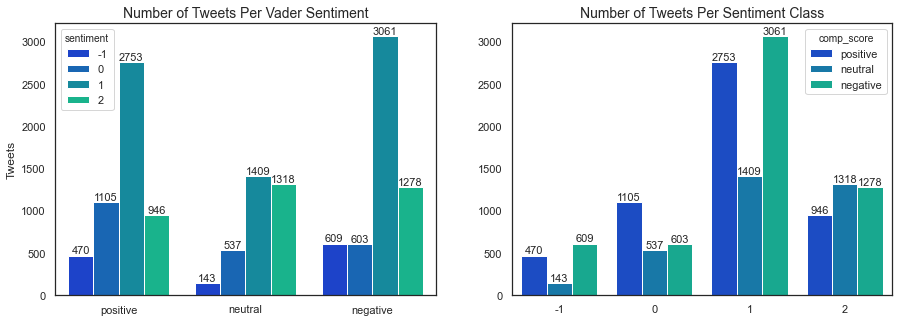

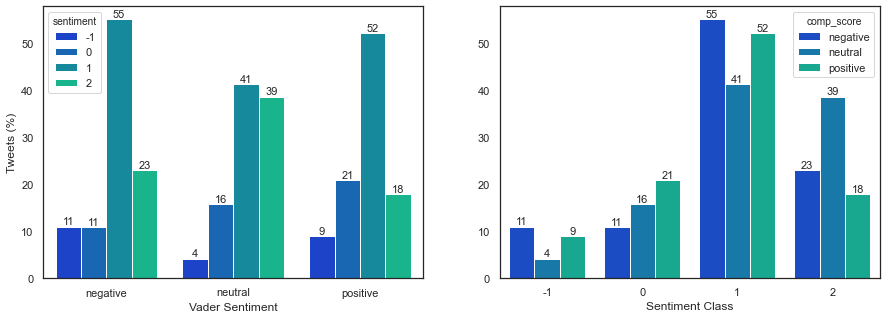

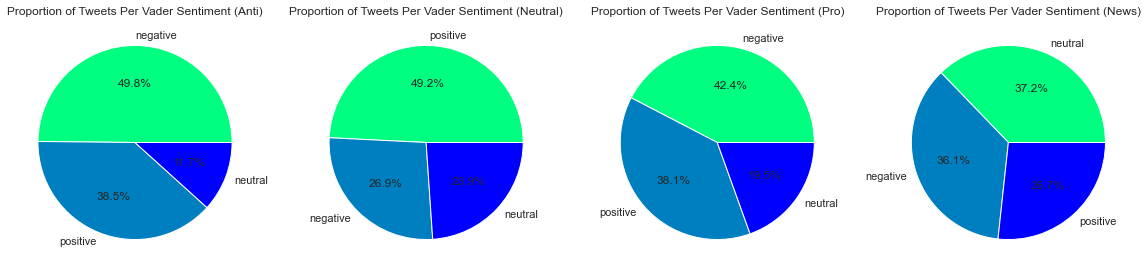

In [39]:
# Vader sentiment
sid = SentimentIntensityAnalyzer() ## instantiate Sentiment analyzer

def sent_decider(compound):
    """
    Function to determine if sentiment is positive, nuetral or negative.
    """
    neutral_point = 0.00
    if compound > neutral_point:
        return 'positive'#1
    elif compound < -neutral_point:
        return 'negative' #-1
    else: 
        return 'neutral'#0

# Get sentiment
df1_train['scores'] = df1_train['message'].apply(lambda review: sid.polarity_scores(review))
df1_train['compound']  = df1_train['scores'].apply(lambda score_dict: score_dict['compound'])
df1_train['comp_score'] = df1_train['compound'].apply(sent_decider)

def put_numbers_on_bars(axis_object):
    """
    Function to plot labels above countplot bars.
    """
    for p in axis_object.patches:
        axis_object.text(p.get_x() + p.get_width()/2., p.get_height(),'%d' % round(p.get_height()), fontsize=11,ha='center', va='bottom')

fig, axis = plt.subplots(ncols=2, figsize=(15, 5))

ax = sns.countplot(x='comp_score', data=df1_train, palette='winter', hue='sentiment', ax=axis[0])
axis[0].set_title('Number of Tweets Per Vader Sentiment',fontsize=14)
axis[0].set_xlabel('')
axis[0].set_ylabel('Tweets')
put_numbers_on_bars(ax)

ax = sns.countplot(x='sentiment', data=df1_train, palette='winter', hue='comp_score', ax=axis[1])
axis[1].set_title('Number of Tweets Per Sentiment Class',fontsize=14)
axis[1].set_xlabel('')
axis[1].set_ylabel('')
put_numbers_on_bars(ax)

plt.show()

# Plots as percentages
fig, axis = plt.subplots(ncols=2, figsize=(15, 5))
counts = (df1_train.groupby(['comp_score'])['sentiment'].value_counts(normalize=True).rename('percentage_tweets').mul(100).reset_index())

ax = sns.barplot(x="comp_score", y="percentage_tweets", palette='winter', hue="sentiment", data=counts, ax=axis[0])
put_numbers_on_bars(ax)
ax.set_xlabel('Vader Sentiment')
ax.set_ylabel('Tweets (%)')

count = (df1_train.groupby(['sentiment'])['comp_score'].value_counts(normalize=True).rename('percentage_tweets').mul(100).reset_index())

ax = sns.barplot(x="sentiment", y="percentage_tweets", palette='winter', hue="comp_score", data=counts, ax=axis[1])
put_numbers_on_bars(ax)
plt.xlabel('Sentiment Class')
plt.ylabel('')

# Plot pie charts
fig, axis = plt.subplots(ncols=4, figsize=(20, 5))
group = ["(Anti)", "(Neutral)", "(Pro)", "(News)"]
for i in range(4):
    df1_train[df1_train['sentiment']==i-1]['comp_score'].value_counts().plot.pie(autopct='%1.1f%%',colormap='winter_r',ax=axis[i])
    axis[i].set_title('Proportion of Tweets Per Vader Sentiment '+ group[i],fontsize=12)
    axis[i].set_ylabel('')
plt.show()

From the above figures, we see that the opinion expressed earlier is not fully supported by the data. Anti and Pro classes have a similar  proportion of tweets that express express themselves in a positive manner (38.5% and 38.1%, respectively). The Anti class has a higher proportion of tweets that are negatively expressed compared to the Pro class. This could possibly be because Anti climate proponents are associated with right wing politics, which is in turn associated populist hostiliy ([Matthew Lockwood, 2018](http://sro.sussex.ac.uk/id/eprint/81164/1/Right%20wing%20populism%20and%20the%20climate%20agenda%20Accepted%20Manuscript.pdf)).  

Some observations worth noting:
* The Anti class has the lowest proportion of tweets that are expressed with nuetrality compared to the other classes' proportions. 
* Neutrally expressed tweets are largest for the News class, as they are expected to deliver information in a balanced manner. Unexpectedly the proportion of tweets are expressed negatively. 
* The tweets that fall under the Neutral class have a much larger proportion (49.2%) of tweets that are expressed positively. 
* Our assumption is therefore wrong: The distributions appear to be very similar, but we don't know how much of this is due to the number of positive vs. the number of negative sentiments.
* The Neutral and News classes tend be more nuetral compared to proportions of other classes. The Neutral class also tends to be more positive than the rest.

### Subjectivity
Subjective sentences generally refer to personal opinion, emotion or judgment and can be measured as a value between 0 and 1.

In [40]:
def subjectivity(text):
    """
    Calculate subjectivity per tweet.
    """
    return TextBlob(text).sentiment.subjectivity
df_train['Subjectivity'] = df_train['message'].apply(subjectivity)

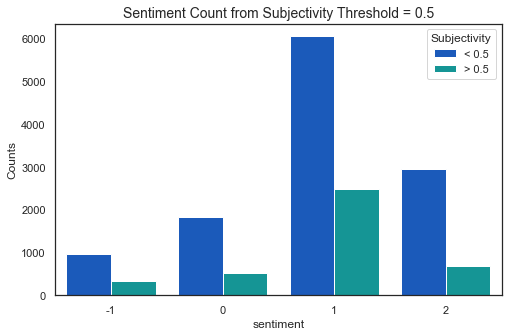

In [41]:
# Sentiment Count from Subjectivity Threshold = 0.5
df_train['Subj'] = ["> 0.5" if i >=0.5 else "< 0.5" for i in df_train['Subjectivity']]
plt.figure(figsize = (8,5))
sns.countplot(x='sentiment', data=df_train, palette='winter', hue='Subj')
plt.xlabel('sentiment')
plt.ylabel('Counts')
plt.legend(title = 'Subjectivity')
plt.title('Sentiment Count from Subjectivity Threshold = 0.5',fontsize=14)
plt.show()

From the figure, we can conclude that the subjectivity measure is not a very good predictor of classifying sentiment and thus may not be an important feature.

### Character and Word Frequencies

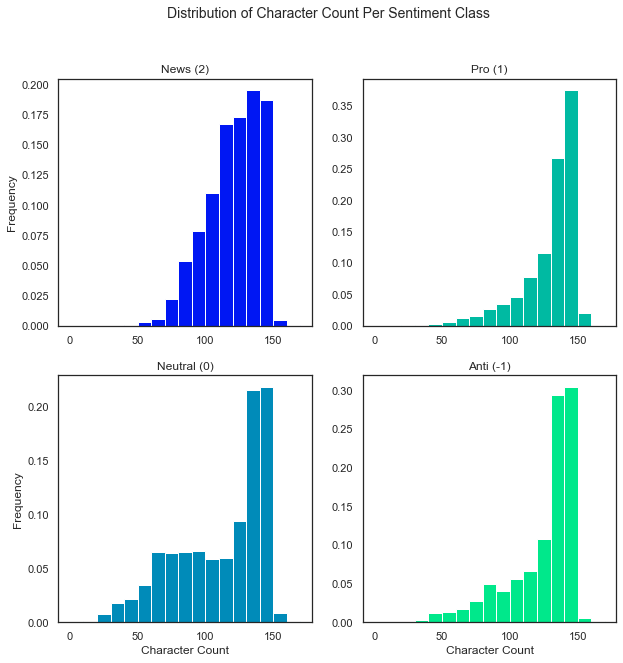

In [42]:
# Tweet Character lengths
df_train['number_of_characters'] = df_train['message'].apply(lambda x: len(x))

# Distribution of Character Count Per Sentiment Class
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.suptitle('Distribution of Character Count Per Sentiment Class', fontsize=14)

bins = range(0, 180, 10)

train_news = df_train[df_train['sentiment']==2]
axis[0, 0].hist(train_news['number_of_characters'], bins=bins, weights=np.zeros(len(train_news)) + 1. / len(train_news), color='#0017F3')
axis[0, 0].set_title('News (2)')
axis[0, 0].set_ylabel('Frequency')

train_neutral = df_train[df_train['sentiment']==0]
axis[1, 0].hist(train_neutral['number_of_characters'], bins=bins, weights=np.zeros(len(train_neutral)) + 1. / len(train_neutral), color='#008BB9')
axis[1, 0].set_title('Neutral (0)')
axis[1, 0].set_ylabel('Frequency')
axis[1, 0].set_xlabel('Character Count')

train_pro = df_train[df_train['sentiment']==1]
axis[0, 1].hist(train_pro['number_of_characters'], bins=bins, weights=np.zeros(len(train_pro)) + 1. / len(train_pro), color='#00BAA2')
axis[0, 1].set_title('Pro (1)')

train_anti = df_train[df_train['sentiment']==-1]
axis[1, 1].hist(train_anti['number_of_characters'], bins=bins, weights=np.zeros(len(train_anti)) + 1. / len(train_anti), color='#00E88B')
axis[1, 1].set_title('Anti (-1)')
axis[1, 1].set_xlabel('Character Count')

plt.show()

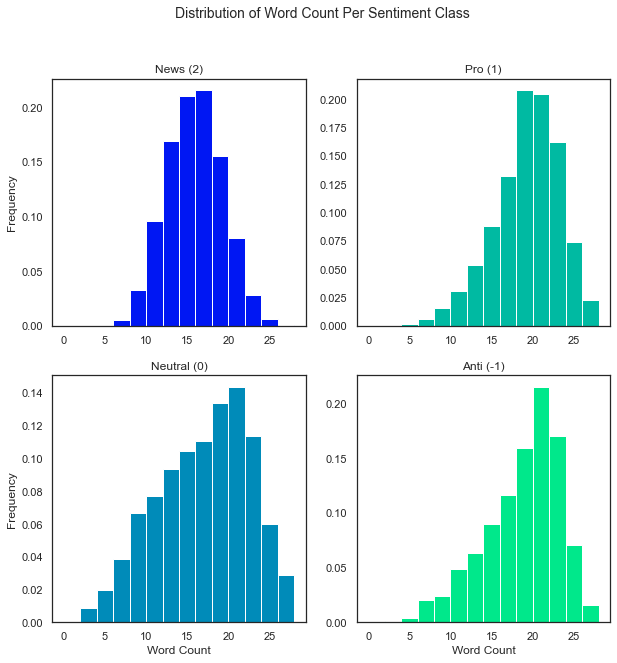

In [43]:
# Tweet word lengths
df_train['number_of_words'] = df_train['message'].apply(lambda x: len(x.split(' ')))

# Distribution of Word Count Per Sentiment Class
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.suptitle('Distribution of Word Count Per Sentiment Class', fontsize=14)

bins = range(0, 30, 2)

train_news = df_train[df_train['sentiment']==2]
axis[0, 0].hist(train_news['number_of_words'], bins=bins, weights=np.zeros(len(train_news)) + 1. / len(train_news), color='#0017F3')
axis[0, 0].set_title('News (2)')
axis[0, 0].set_ylabel('Frequency')

train_neutral = df_train[df_train['sentiment']==0]
axis[1, 0].hist(train_neutral['number_of_words'], bins=bins, weights=np.zeros(len(train_neutral)) + 1. / len(train_neutral), color='#008BB9')
axis[1, 0].set_title('Neutral (0)')
axis[1, 0].set_ylabel('Frequency')
axis[1, 0].set_xlabel('Word Count')

train_pro = df_train[df_train['sentiment']==1]
axis[0, 1].hist(train_pro['number_of_words'], bins=bins, weights=np.zeros(len(train_pro)) + 1. / len(train_pro), color='#00BAA2')
axis[0, 1].set_title('Pro (1)')

train_anti = df_train[df_train['sentiment']==-1]
axis[1, 1].hist(train_anti['number_of_words'], bins=bins, weights=np.zeros(len(train_anti)) + 1. / len(train_anti), color='#00E88B')
axis[1, 1].set_title('Anti (-1)')
axis[1, 1].set_xlabel('Word Count')

plt.show()

### URL Analysis

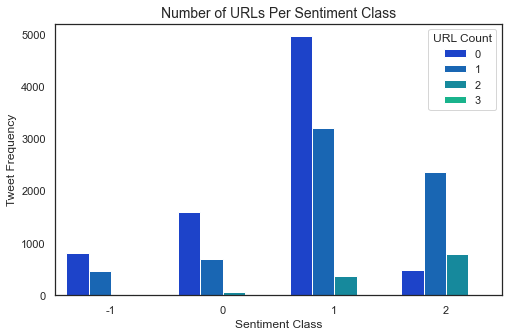

In [44]:
# Check if URLs have anything to do with distribution of sentiments.
# Count URLs
url_text = r"https?://t\.co/\S+"

df_train['url_list'] = df_train['message'].apply(lambda tweet: re.findall(url_text, tweet))

df_train['url_count'] = df_train['url_list'].apply(len)

# Plot sentiment
plt.figure(figsize = (8,5))
sns.countplot(x='sentiment', data=df_train, palette='winter', hue='url_count')
plt.title('Number of URLs Per Sentiment Class',fontsize=14)
plt.xlabel('Sentiment Class')
plt.ylabel('Tweet Frequency')
plt.legend(title='URL Count')
plt.show()

From the figure, it appears that tweets related to news are more likely to have links than not, compared to other classes.

### Hashtag and Mention Analysis

In [45]:
def grab_hash_tags_or_mention(tweet, grab='#'):
    """
    Extract hashtags and mentions based on prefix symbols.
    """
    return [tag.lower() for tag in tweet.split() if tag.startswith(grab)]

puntuations=string.punctuation+'…'+'Ã¢â‚¬Â¦'

def remove_punct_end_of_tag(tag):
    """
    Remove punctuation at end of hashtag.
    """
    ortag = tag
    not_alpha=True
    tag_lenth = len(tag)
    if tag_lenth <= 2:
        return None
    elif (tag[-8:]=='#Ã¢â‚¬Â¦') or (tag[-8:]=='@Ã¢â‚¬Â¦'):
        return None
    for i in range(tag_lenth):
        if tag:
            if (tag[-1] in puntuations):
                tag = tag[:-1]
                not_alpha = tag[-1] in puntuations
            else:
                break         
    return tag

In [46]:
# Grab hashtags and mentions
df_train['hash_tags'] = df_train['message'].apply(grab_hash_tags_or_mention)
df_train['hash_tags'] = df_train['hash_tags'].apply(lambda tags: [remove_punct_end_of_tag(tag) for tag in tags if tag])

df_train['mentions'] = df_train['message'].apply(lambda tweet: grab_hash_tags_or_mention(tweet, grab='@'))
df_train['mentions'] = df_train['mentions'].apply(lambda tags: [remove_punct_end_of_tag(tag) for tag in tags if tag])

In [47]:
# Split hashtags based on sentiment class
HT_neg = df_train['hash_tags'][df_train['sentiment'] == -1]
HT_neutral = df_train['hash_tags'][df_train['sentiment'] == 0]
HT_pos = df_train['hash_tags'][df_train['sentiment'] == 1]
HT_news = df_train['hash_tags'][df_train['sentiment'] == 2]

HT_neg = sum(HT_neg, [])
HT_neutral = sum(HT_neutral, [])
HT_pos = sum(HT_pos, [])
HT_news = sum(HT_news, [])

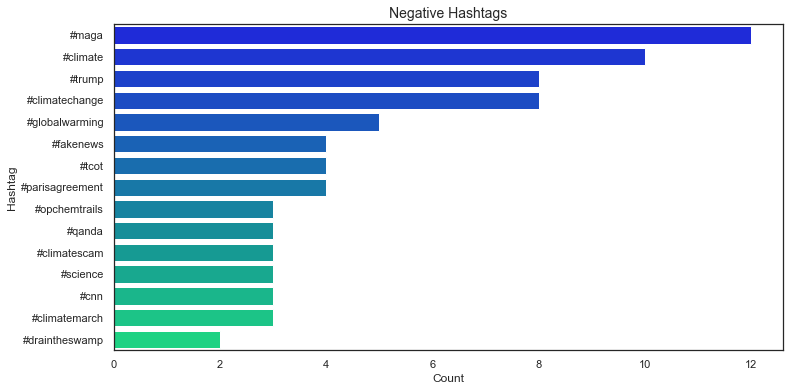

In [48]:
# HT_neg
p = nltk.FreqDist(HT_neg)
d = pd.DataFrame({'Hashtag': list(p.keys()), 'Count': list(p.values())})
d = d.nlargest(columns = 'Count', n = 15)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=d, y ='Hashtag', x ='Count', palette='winter', orient='h')
plt.title('Negative Hashtags',fontsize=14)
plt.show()

It is interesting to note that the top hashtag for tweets that do not believe in climate change is political.

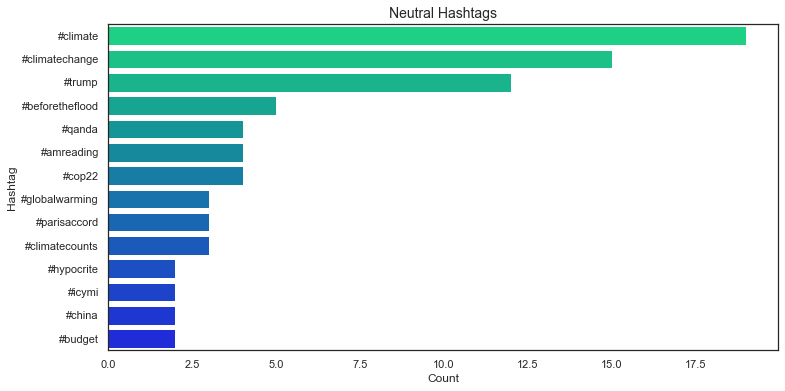

In [49]:
# HT_neutral
p = nltk.FreqDist(HT_neutral)
d = pd.DataFrame({'Hashtag': list(p.keys()), 'Count': list(p.values())})
d = d.nlargest(columns = 'Count', n = 15)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=d, y ='Hashtag', x ='Count', palette='winter_r', orient='h')
plt.title('Neutral Hashtags',fontsize=14)
plt.show()

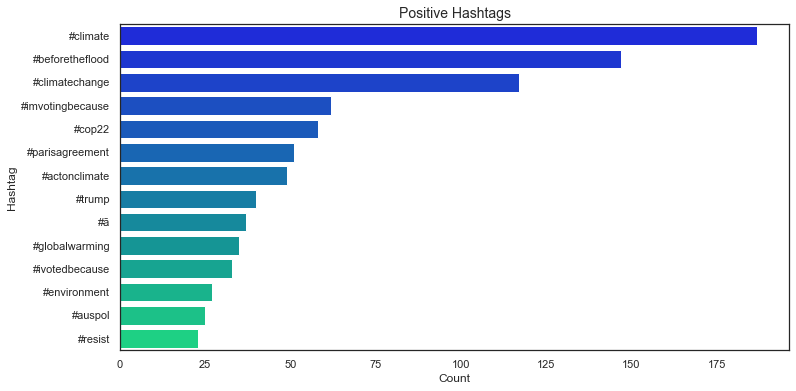

In [50]:
# HT_pos
p = nltk.FreqDist(HT_pos)
d = pd.DataFrame({'Hashtag': list(p.keys()), 'Count': list(p.values())})
d = d.nlargest(columns = 'Count', n = 15)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=d, y ='Hashtag', x ='Count', palette='winter', orient='h')
plt.title('Positive Hashtags',fontsize=14)
plt.show()

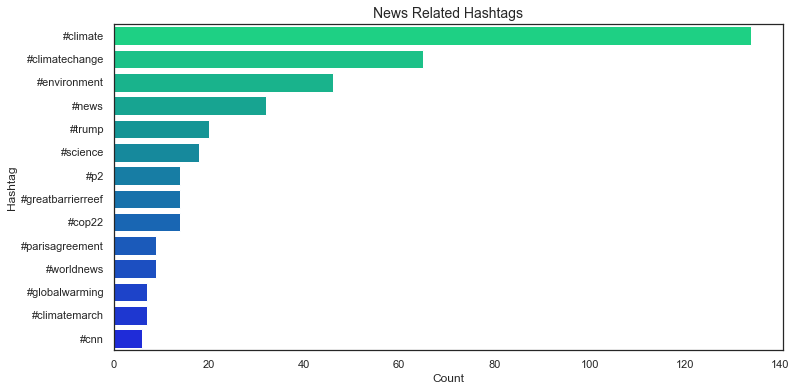

In [51]:
# HT_news
p = nltk.FreqDist(HT_news)
d = pd.DataFrame({'Hashtag': list(p.keys()), 'Count': list(p.values())})
d = d.nlargest(columns = 'Count', n = 15)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=d, y ='Hashtag', x ='Count', palette='winter_r', orient='h')
plt.title('News Related Hashtags',fontsize=14)
plt.show()

In [52]:
def mentions_or_hash_count_df(df, col = 'mentions'): 
    """
    Make count dataframes.
    """
    tags = []
    for i, row in df.iterrows():
        for tag in row[col]:
            if tag:
                tags.append(tag)
    counts = dict(Counter(tags)).items()
    return pd.DataFrame(counts, columns=[col, col+'_count']).sort_values(by=col+'_count', ascending=False)

mentions_counts = mentions_or_hash_count_df(df_train, col = 'mentions')
hash_tags = mentions_or_hash_count_df(df_train, col = 'hash_tags')

In [53]:
# Create tables for sentiment for Hashtag- and Mentions counts
df_sent_selctors = [df_train['sentiment']==sent for sent in [-1,0,1,2]]

# Create empty dataframe that will store the counts with sentiments
mentions_sents = pd.DataFrame(columns=['mentions', 'mentions_count', 'sentiment'])
hash_sents = pd.DataFrame(columns=['hash_tags', 'hash_tags_count', 'sentiment'])

# Add values to the empty dataframe
for i, selector in enumerate(df_sent_selctors): 
  # mentions
    mentions_counts = mentions_or_hash_count_df(df_train[selector], col = 'mentions')
    mentions_counts['sentiment'] = i-1
    mentions_sents=pd.concat([mentions_sents, mentions_counts], ignore_index=True, copy=False)
  
  # hashtags
    hash_counts = mentions_or_hash_count_df(df_train[selector], col = 'hash_tags')
    hash_counts['sentiment'] = i-1
    hash_sents = pd.concat([hash_sents, hash_counts], ignore_index=True, copy=False)

In [54]:
# Check Hashtag counts with Sentiments
b = hash_sents.drop(columns=['sentiment']).groupby('hash_tags').sum()
(b['hash_tags_count']).sort_values()
b = b[b['hash_tags_count']>20].sort_values(by= 'hash_tags_count', ascending=False)
print(b)
top_hash_tags = list(b.index)

                  hash_tags_count
hash_tags                        
#climate                      350
#climatechange                205
#beforetheflood               156
#trump                         80
#cop22                         76
#environment                   74
#parisagreement                65
#imvotingbecause               62
#globalwarming                 50
#actonclimate                  49
#science                       39
#ã                             39
#news                          34
#ivotedbecause                 33
#auspol                        31
#p2                            26
#climatemarch                  25
#maga                          24
#resist                        23


In [55]:
# Check Mentions counts with sentiments
a = mentions_sents.drop(columns=['sentiment']).groupby('mentions').sum()
a = a[a['mentions_count']>40].sort_values(by= 'mentions_count', ascending=False)
print(a)
top_mentions = list(a.index)

                  mentions_count
mentions                        
@stephenschlegel             307
@realdonaldtrump             261
@sensanders                  253
@berniesanders               126
@leodicaprio                 124
@natgeochannel               124
@cnn                         122
@nytimes                     100
@thehill                      91
@washingtonpost               76
@climatecentral               72
@sethmacfarlane               70
@climatehawk1                 66
@independent                  59
@guardian                     55
@reuters                      49
@stevesgoddard                46
@kamalaharris                 42


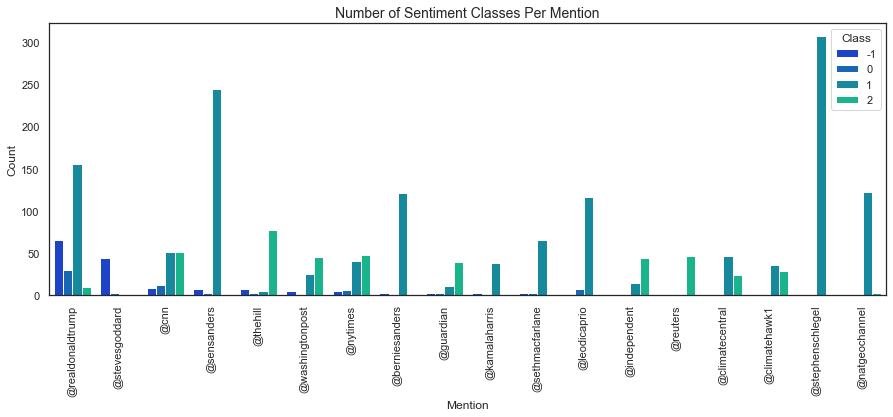

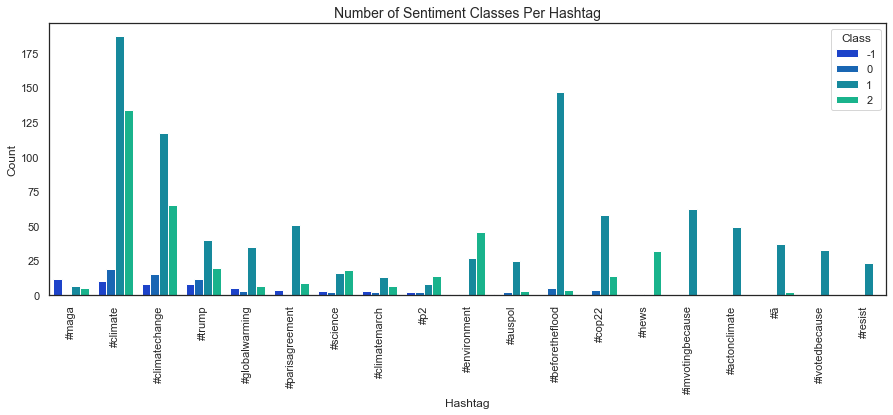

In [56]:
# Top Mentions and Hashtags
conditions = [(mentions_sents['mentions']==mention) for mention in top_mentions]
selector = mentions_sents['mentions'] == ',,,,,,'    
for condition in conditions:
    selector = selector|condition

fig,axis = plt.subplots(figsize=(15,5))
sns.barplot(x='mentions', y='mentions_count', data=mentions_sents[selector], palette='winter', hue='sentiment')
plt.xticks(rotation=90)
plt.title('Number of Sentiment Classes Per Mention',fontsize=14)
plt.legend(title='Class',loc='upper right')
plt.ylabel('Count')
plt.xlabel('Mention')
plt.show()

conditions = [(hash_sents['hash_tags']==hashtag) for hashtag in top_hash_tags]
selector = hash_sents['hash_tags'] == ',,,,,,' 
for condition in conditions:
    selector = selector|condition
    
fig,axis = plt.subplots(figsize=(15,5))
sns.barplot(x='hash_tags', y ='hash_tags_count', data=hash_sents[selector], palette='winter', hue='sentiment')
plt.xticks(rotation=90)
plt.title('Number of Sentiment Classes Per Hashtag',fontsize=14)
plt.legend(title='Class',loc='upper right')
plt.ylabel('Count')
plt.xlabel('Hashtag')
plt.show()

### Retweet Analysis

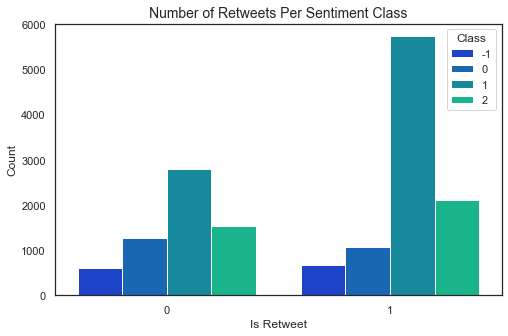

In [97]:
# Class distribution for set of retweeted-tweets and set without retweets
plt.figure(figsize = (8,5))
df_train['is_retweet'] = df_train['message'].apply(lambda tweet: 1 if tweet.startswith('RT @') else 0)
sns.countplot(x='is_retweet', data=df_train, palette='winter', hue='sentiment')
plt.title('Number of Retweets Per Sentiment Class',fontsize=14)
plt.xlabel('Is Retweet')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()

For the Pro-climate change class, 18% of tweets are retweeted, whereas the rest of the classes are retweeted repeatedly well below 10%. It appears that in general, the Pro class leads to repeated retweets more than other classes.

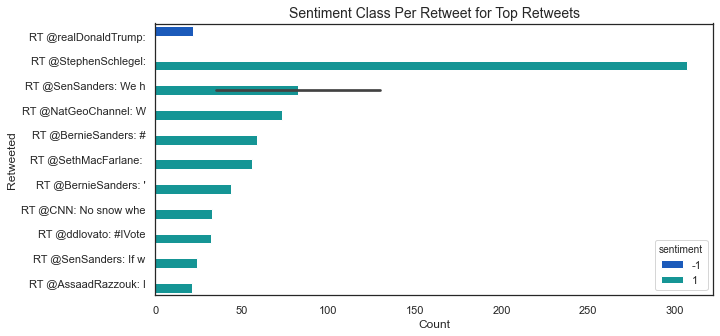

In [100]:
# Top retweets per Sentiment
df_train1 = pd.read_csv('Data/train.csv')
def count_retweets(df):
    retweets = []
    for i, row in df.iterrows():
        if row['message'].startswith('RT @'):
            retweets.append(row['message'])
    counts = dict(Counter(retweets)).items()
    return pd.DataFrame(counts, columns=['retweeted', 'retweet_count']).sort_values(by='retweet_count', ascending=False)

df_sent_selctors = [df_train1['sentiment']==sent for sent in [-1,0,1,2]]
retweet_sents = pd.DataFrame(columns=['retweeted', 'retweet_count', 'sentiment'])

for i, selector in enumerate(df_sent_selctors):
    retweet_counts = count_retweets(df_train1[selector])
    retweet_counts['sentiment'] = i-1
    retweet_sents=pd.concat([retweet_sents, retweet_counts], ignore_index=True,copy=False)  
    
c = retweet_sents.drop(columns=['sentiment']).groupby('retweeted').sum()
c = c[c['retweet_count']>20].sort_values(by= 'retweet_count').index
top_retweets = list(c)

# Plot for all sents
conditions = [(retweet_sents['retweeted']==retweet) for retweet in top_retweets]
selector = retweet_sents['retweeted'] == ',,,,,,' 

for condition in conditions:
    selector = selector|condition

shortened_retweets = retweet_sents.copy()
shortened_retweets['retweeted'] = shortened_retweets['retweeted'].apply(lambda rt: rt[:20])
fig,axis = plt.subplots(figsize=(10,5))
sns.barplot(y='retweeted', x='retweet_count', data=shortened_retweets[selector], palette='winter', hue='sentiment', orient='h')
plt.title('Sentiment Class Per Retweet for Top Retweets',fontsize=14)
plt.xlabel('Count')
plt.ylabel('Retweeted')
plt.show()

It appears that the majotiry of Sanders and Schlegel mentions (and others) are due to retweets. Could these retweets be the reason that there are so much more Pro climate change tweets compared to other classes? If we look at the non-retweeted (original) tweets, the Pro class is not as exaggerated.

The @realDonaldTrump tweets do not show up as much as the other mentions and hashtags. These mentions and hashtags also do not have an exaggerated difference between classes.

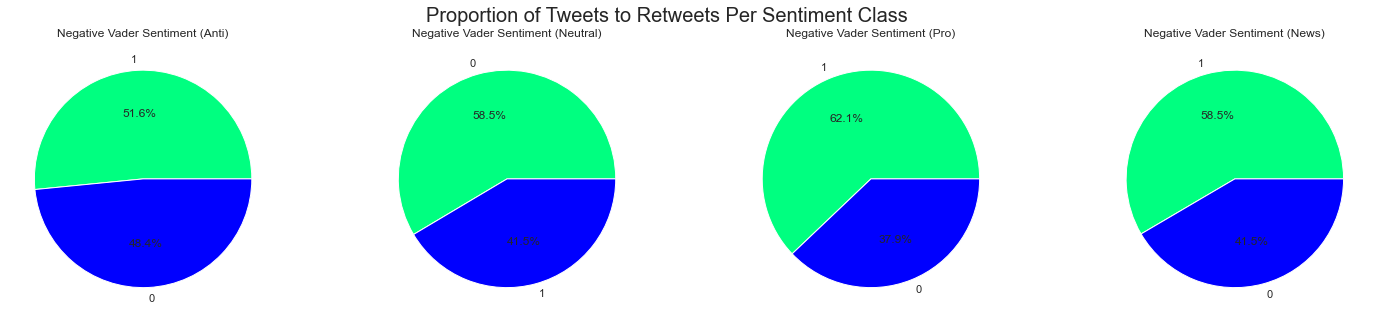

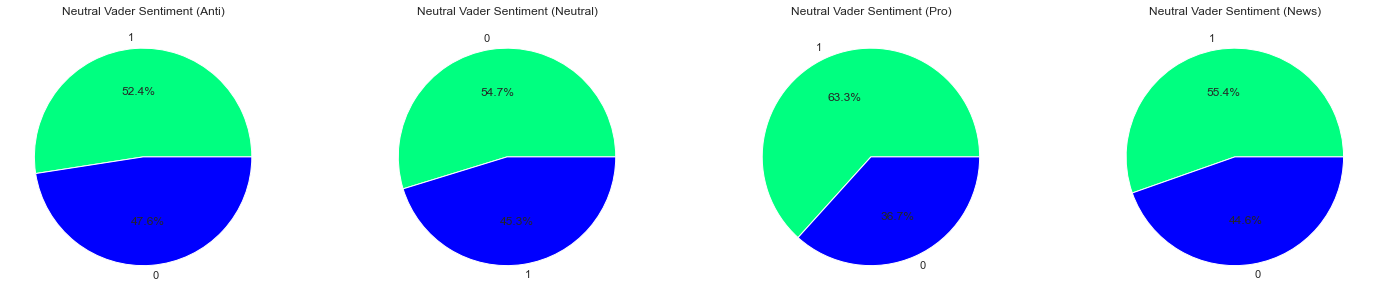

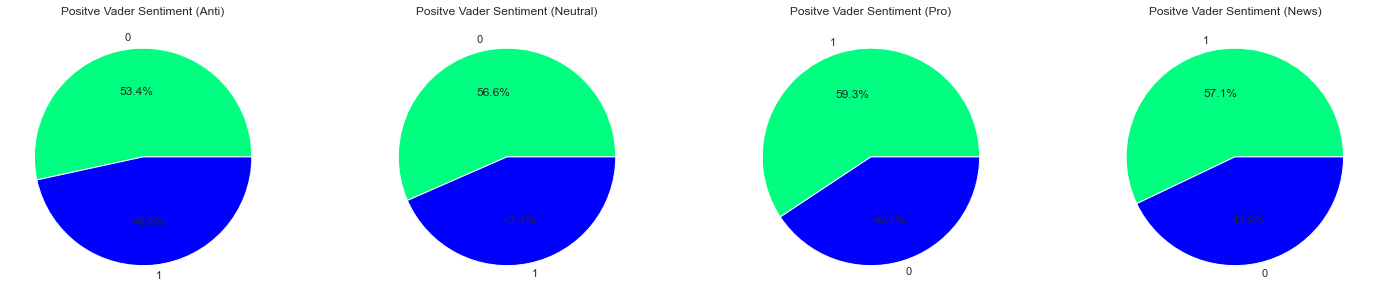

In [101]:
# Retweet Proportions
df1_train['is_retweet'] = df1_train['message'].apply(lambda tweet: 1 if tweet.startswith('RT @') else 0)
fig, axis = plt.subplots(ncols=4, figsize=(25, 5))
fig.suptitle('Proportion of Tweets to Retweets Per Sentiment Class', fontsize=20)
group = ["(Anti)", "(Neutral)", "(Pro)", "(News)"]
for i in range(4):
    df1_train[(df1_train['sentiment']==i-1) & (df1_train['comp_score']=='negative')]['is_retweet'].value_counts().plot.pie(autopct='%1.1f%%',colormap='winter_r',ax=axis[i])
    axis[i].set_title('Negative Vader Sentiment '+ group[i])
    axis[i].set_ylabel('')
plt.show()

fig, axis = plt.subplots(ncols=4, figsize=(25, 5))
for i in range(4):
    df1_train[(df1_train['sentiment']==i-1) & (df1_train['comp_score']=='neutral')]['is_retweet'].value_counts().plot.pie(autopct='%1.1f%%',colormap='winter_r',ax=axis[i])
    axis[i].set_title('Neutral Vader Sentiment '+ group[i])
    axis[i].set_ylabel('')
plt.show()

fig, axis = plt.subplots(ncols=4, figsize=(25, 5))
for i in range(4):
    df1_train[(df1_train['sentiment']==i-1) & (df1_train['comp_score']=='positive')]['is_retweet'].value_counts().plot.pie(autopct='%1.1f%%',colormap='winter_r',ax=axis[i])
    axis[i].set_title('Positve Vader Sentiment '+ group[i])
    axis[i].set_ylabel('')
plt.show()

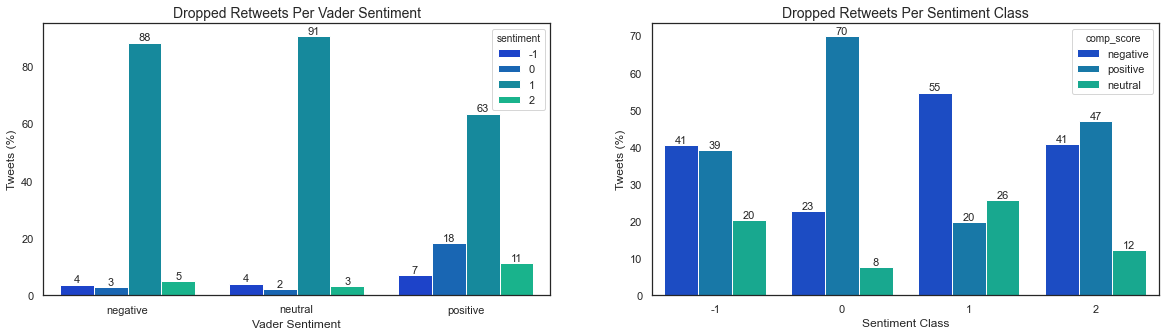

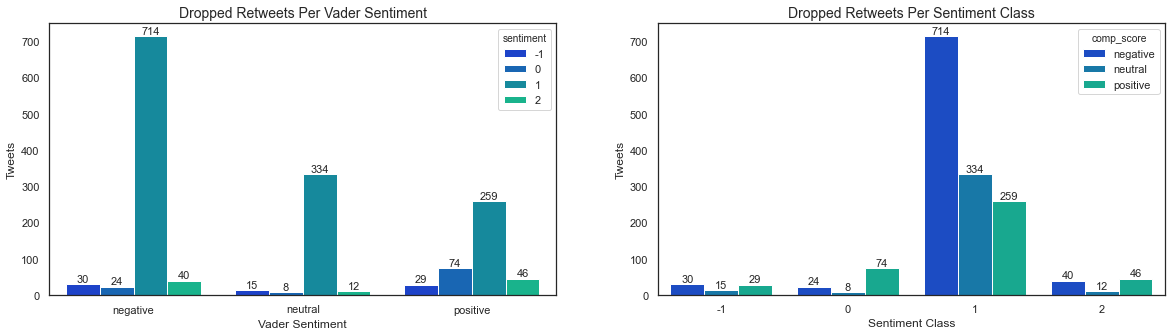

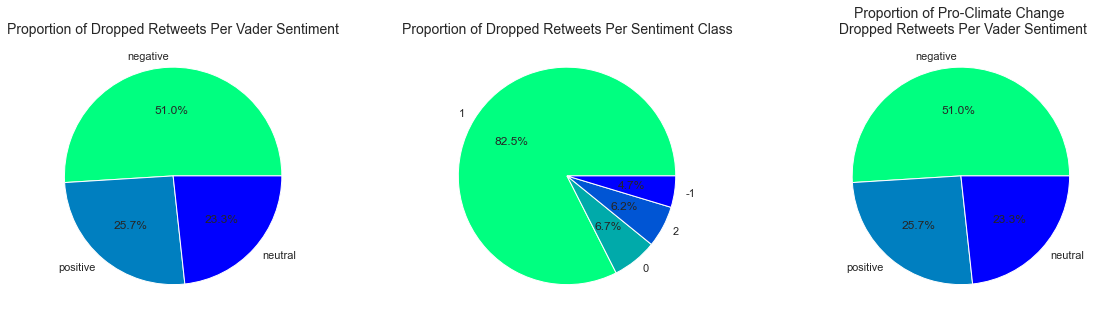

In [102]:
sid = SentimentIntensityAnalyzer() ## instantiate Sentiment analyzer

def sent_decider(compound):
    """
    Function to determine if sentiment is positive, nuetral or negative.
    """
    neutral_point = 0.00
    if compound > neutral_point:
        return 'positive'#1
    elif compound < -neutral_point:
        return 'negative' #-1
    else: 
        return 'neutral'#0

# Get sentiment
dropped_rows['scores'] = dropped_rows['message'].apply(lambda review: sid.polarity_scores(review))
dropped_rows['compound']  = dropped_rows['scores'].apply(lambda score_dict: score_dict['compound'])
dropped_rows['comp_score'] = dropped_rows['compound'].apply(sent_decider)

# Plots

fig, axis = plt.subplots(ncols=2, figsize=(20, 5))
counts = (dropped_rows.groupby(['comp_score'])['sentiment'].value_counts(normalize=True).rename('percentage_tweets').mul(100).reset_index())

ax = sns.barplot(x="comp_score", y="percentage_tweets", palette='winter', hue="sentiment", data=counts, ax=axis[0])
put_numbers_on_bars(ax)
axis[0].set_xlabel('Vader Sentiment')
axis[0].set_ylabel('Tweets (%)')
axis[0].set_title('Dropped Retweets Per Vader Sentiment',fontsize=14)

counts = (dropped_rows.groupby(['sentiment'])['comp_score'].value_counts(normalize=True).rename('percentage_tweets').mul(100).reset_index())

ax = sns.barplot(x="sentiment", y="percentage_tweets", palette='winter', hue="comp_score", data=counts, ax=axis[1])
put_numbers_on_bars(ax)
axis[1].set_xlabel('Sentiment Class')
axis[1].set_ylabel('Tweets (%)')
axis[1].set_title('Dropped Retweets Per Sentiment Class',fontsize=14)

fig, axis = plt.subplots(ncols=2, figsize=(20, 5))

ax = sns.countplot(x='comp_score', data=dropped_rows, palette='winter', hue='sentiment', ax=axis[0])
axis[0].set_title('Dropped Retweets Per Vader Sentiment',fontsize=14)
axis[0].set_xlabel('Vader Sentiment')
axis[0].set_ylabel('Tweets')
put_numbers_on_bars(ax)

ax = sns.countplot(x='sentiment', data=dropped_rows, palette='winter', hue='comp_score', ax=axis[1])
axis[1].set_title('Dropped Retweets Per Sentiment Class',fontsize=14)
axis[1].set_xlabel('Sentiment Class')
axis[1].set_ylabel('Tweets')
put_numbers_on_bars(ax)

plt.show()

# Plot Pie chart for duplicate retweets's Vader sentiment share and Class share
fig, axis = plt.subplots(ncols=3, figsize=(20, 5))
axis = axis.flat

(dropped_rows['comp_score'].value_counts().plot.pie(autopct='%1.1f%%', colormap='winter_r', ax=axis[0]))
axis[0].set_title('Proportion of Dropped Retweets Per Vader Sentiment',fontsize=14)
axis[0].set_ylabel('')

(dropped_rows['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colormap='winter_r', ax=axis[1]))
axis[1].set_title('Proportion of Dropped Retweets Per Sentiment Class',fontsize=14)
axis[1].set_ylabel('')

(dropped_rows['comp_score'].value_counts().plot.pie(autopct='%1.1f%%', colormap='winter_r', ax=axis[2]))
axis[2].set_title('Proportion of Pro-Climate Change \n Dropped Retweets Per Vader Sentiment',fontsize=14)
axis[2].set_ylabel('')
plt.show()

From the above figures, we note that:
* The number of repeated retweets in the News class are rarely neutral, but seem to seem to favour tweets that have a positive Vader sentiment. 
* The majority of repeated retweets in the Neutral class favour positive Vader Sentiment tweets (70% of neutral class). 
* The Anti class are rarely repeatedly retweeted if they tweet a neutral Vader sentiment tweet. 
* The Anti climate change tweets are retweeted repeatedly almost equally for retweets with negative and positive Vader sentiment. 
* The tweets that express Pro-climate change stance dominate for all repeated retweets (82.5%). 
* Pro tweets are repeatedly retweeted the least when they express tweets with a positive Vader sentiment.

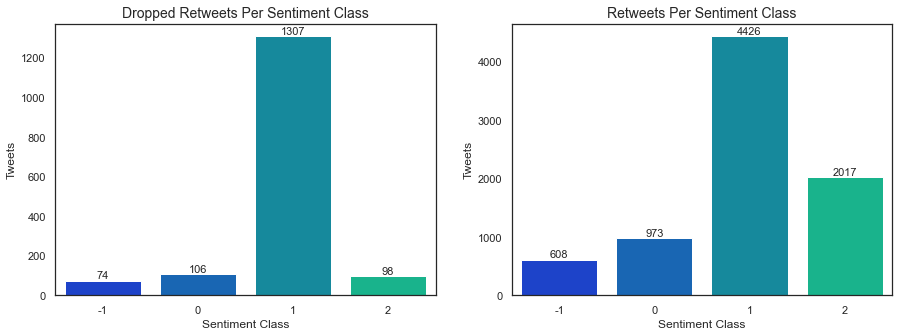

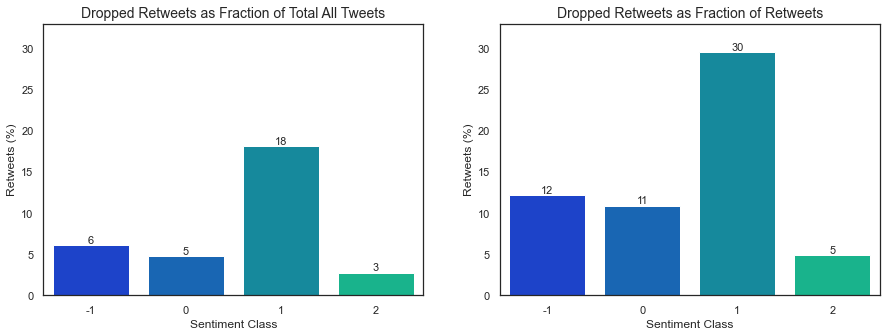

In [103]:
# Analyse dropped rows (retweets)
dropped_rows['is_retweet'] = dropped_rows['message'].apply(lambda tweet: 1 if tweet.startswith('RT @') else 0)
dropped_rows = dropped_rows[dropped_rows['is_retweet']==1]

fig, axis = plt.subplots(ncols=2, figsize=(15, 5))

ax = sns.countplot(x="sentiment", palette='winter', data=dropped_rows, ax=axis[0])
put_numbers_on_bars(ax)
axis[0].set_xlabel('Sentiment Class')
axis[0].set_ylabel('Tweets')
axis[0].set_title('Dropped Retweets Per Sentiment Class',fontsize=14)


ax = sns.countplot(x="sentiment", palette='winter', data=df1_train[df1_train['is_retweet']==1], ax=axis[1])
put_numbers_on_bars(ax)
axis[1].set_xlabel('Sentiment Class')
axis[1].set_ylabel('Tweets')
axis[1].set_title('Retweets Per Sentiment Class',fontsize=14)
plt.show()

# As percentage
fig, axis = plt.subplots(ncols=2, figsize=(15, 5))

# Count retweets in duplicate retweets and complete orignal data
counts_original = (df1_train['sentiment'].value_counts())
counts_retweets = (dropped_rows['sentiment'].value_counts())

counts_retweets_fraction = ((counts_retweets/counts_original*100).rename_axis('sentiment').reset_index(name='Number of Tweets'))

ax = sns.barplot(x='sentiment', y='Number of Tweets', data=counts_retweets_fraction, palette='winter', ax=axis[0])
ax.set_title('Dropped Retweets as Fraction of Total All Tweets',fontsize=14)
ax.set_xlabel('Sentiment Class')
ax.set_ylabel("Retweets (%)")
ax.set_ylim(ymax=33)
put_numbers_on_bars(ax)

# Count retweets in orignal data
counts_original = (df1_train[df1_train['is_retweet']==1]['sentiment'].value_counts())
counts_retweets = (dropped_rows['sentiment'].value_counts())

counts_retweets_fraction = ((counts_retweets/counts_original*100).rename_axis('sentiment').reset_index(name='Number of Tweets'))

ax = sns.barplot(x='sentiment', y='Number of Tweets', data=counts_retweets_fraction, palette='winter', ax=axis[1])
ax.set_title('Dropped Retweets as Fraction of Retweets',fontsize=14)
ax.set_xlabel('Sentiment Class')
ax.set_ylabel("Retweets (%)")
ax.set_ylim(ymax=33)
put_numbers_on_bars(ax)
plt.show()

<a id="preprocessing"></a>
## 5. Data Preprocessing

### Feature Engineering

In [62]:
# Remove words used to scrape tweets
# all_classes = ['globalwarming','global','warming','climatechange', 'climate', 'change']
# train_data['final'] = train_data['final'].apply(lambda x : [i for i in x if i not in all_classes])
# test_data['final'] = test_data['final'].apply(lambda x : [i for i in x if i not in all_classes])

In [63]:
# train_data['final'] = train_data['final'].replace(to_replace = r"[\d-]", value = '', regex = True)
# train_data['final'] = train_data['final'].replace(to_replace = "...", value = '')
# train_data['final'] = train_data['final'].replace(to_replace = "..", value = '')

### Resampling
We addressed the problem of imbalanced training data by resampling the data before building our models. A class size was determined based on the second largest sentiment class and other classes were either upsampled or downsampled according to the class size. However, resampling the data did not improve the performance of the models and we therefore excluded it.

In [64]:
# df_pro = train_data[train_data['sentiment']==1]
# df_news =  train_data[train_data['sentiment']==2]
# df_neutral = train_data[train_data['sentiment']==0]
# df_anti = train_data[train_data['sentiment']==-1]
# train_data['sentiment'].value_counts()

In [65]:
# class_size = 3640 # Class size = can be roughly half the size of the largest size
# def resampling(df):
#     if len(df['sentiment']) > class_size:
#         df = resample(df, replace=False, n_samples=class_size, random_state=42)
#     else:
#         df = resample(df, replace=True, n_samples=class_size, random_state=42)
#     return df
# df_pro_resampled = resampling(df_pro)
# df_news_resampled =  resampling(df_news)
# df_neutral_resampled = resampling(df_neutral)
# df_anti_resampled = resampling(df_anti)
# train_data = pd.concat([df_pro_resampled,df_news_resampled,df_neutral_resampled,df_anti_resampled])
# train_data['sentiment'].value_counts()

### Lemmatisation
Lemmatisation aims to remove inflectional word endings to return the base or dictionary form of a word, also known as "lemma". We used the WordNetLemmatizer() from nltk, as well as by way of applying part of speech.

In [104]:
def get_part_of_speech(word):
    """
    Find part of speech of word if part of speech is either noun, verb, adjective etc and add it to a list.
    """
    probable_part_of_speech = wordnet.synsets(word) ## finding word that is most similar (synonyms) for semantic reasoning
    pos_counts = Counter() ## instantiating our counter class
    pos_counts["n"] = len([i for i in probable_part_of_speech if i.pos()=="n"])
    pos_counts["v"] = len([i for i in probable_part_of_speech if i.pos()=="v"])
    pos_counts["a"] = len([i for i in probable_part_of_speech if i.pos()=="a"])
    pos_counts["r"] = len([i for i in probable_part_of_speech if i.pos()=="r"])
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0] ## will extract the most likely part of speech from the list
    return most_likely_part_of_speech

normalizer = WordNetLemmatizer()

train_data['final'] = train_data['final'].apply(lambda x: [normalizer.lemmatize(token, get_part_of_speech(token)) for token in x])
test_data['final'] = test_data['final'].apply(lambda x: [normalizer.lemmatize(token, get_part_of_speech(token)) for token in x])

### Split Training and Validation Sets
* Training data: Data that contains a known label. The model is trained on this data to be able to generalize unlabeled data.
* Validation data: A subset of the training data that is used to assess how well the algorithm was trained on the training data.
* Test data: Data that is used to provide an unbiased evaluation of the final model fit on the training dataset.

In [67]:
X = train_data['final']
y = train_data['sentiment']
X_test = test_data['final']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state = 42)

### Feature Extraction
The TfidfVectorizer transforms text to feature vectors that can be used as input to a classification model.

In [68]:
X_train = list(X_train.apply(' '.join))
X_val = list(X_val.apply(' '.join))

vectorizer = TfidfVectorizer(sublinear_tf=True, smooth_idf = True, max_df = 0.3, min_df = 5, ngram_range = (1, 2))
vectorizer.fit(X_train)

# vect_save_path = "TfidfVectorizer.pkl"
# with open(vect_save_path,'wb') as file:
#     pickle.dump(vectorizer,file)

X_train = vectorizer.transform(X_train)
X_val = vectorizer.transform(X_val)

<a id="modelling"></a>
## 6. Modelling

### Logistic Regression
Logistic regression is a statistical model that makes use of a logistic function to model a binary dependent variable, however, multiclass classification with logistic regression can be done through the one-vs-rest scheme in which a separate model is trained for each class to predict whether an observation is that class or not (thus making it a binary classification problem).

In [69]:
modelstart = time.time()
logreg = LogisticRegression(C=1000, multi_class='ovr', solver='saga', random_state=42, max_iter=10)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_val)
logreg_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred, y_val))
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
report = classification_report(y_val, y_pred, output_dict=True)
results = pd.DataFrame(report).transpose()
# results.to_csv("logreg_report.csv")
results
# model_save_path = "logreg_model.pkl"
# with open(model_save_path,'wb') as file:
#     pickle.dump(logreg,file)

Accuracy 0.7610619469026548
Model Runtime: 0.28 seconds


,precision,recall,f1-score,support
-1,0.663158,0.500000,0.570136,126.000000
0,0.586207,0.455357,0.512563,224.000000
1,0.802062,0.869274,0.834316,895.000000
2,0.760933,0.774481,0.767647,337.000000
accuracy,0.761062,0.761062,0.761062,0.761062
macro avg,0.703090,0.649778,0.671165,1582.000000
weighted avg,0.751674,0.761062,0.753515,1582.000000


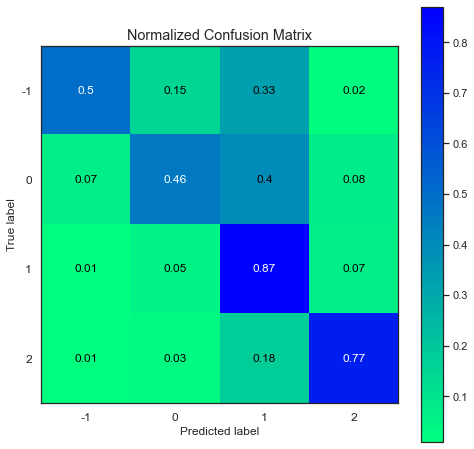

In [70]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

### Multinomial Naive Bayes
The Multinomial Naive Bayes model estimates the conditional probability of a particular feature given a class and uses a multinomial distribution for each of the features. The model assumes that each feature makes an independent and equal contribution to the outcome.

In [71]:
modelstart= time.time()
multinb = MultinomialNB()
multinb.fit(X_train, y_train)
y_pred = multinb.predict(X_val)
multinb_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred, y_val))
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
report = classification_report(y_val, y_pred, output_dict=True)
results = pd.DataFrame(report).transpose()
# results.to_csv("multinb_report.csv")
results
# model_save_path = "multinb_model.pkl"
# with open(model_save_path,'wb') as file:
#     pickle.dump(multinb,file)

Accuracy 0.7256637168141593
Model Runtime: 0.01 seconds


,precision,recall,f1-score,support
-1,1.000000,0.166667,0.285714,126.000000
0,0.818182,0.160714,0.268657,224.000000
1,0.698675,0.943017,0.802663,895.000000
2,0.799353,0.732938,0.764706,337.000000
accuracy,0.725664,0.725664,0.725664,0.725664
macro avg,0.829053,0.500834,0.530435,1582.000000
weighted avg,0.761042,0.725664,0.677793,1582.000000


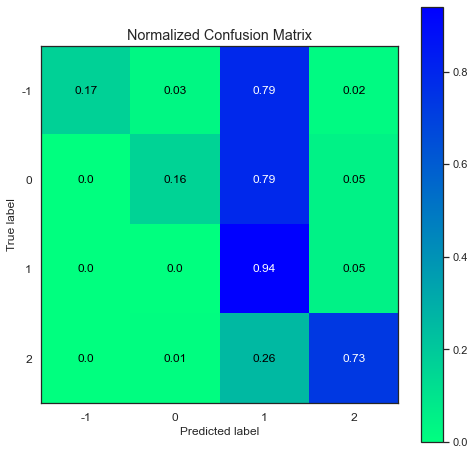

In [72]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

### Random Forest Classifier
Random forest models are an example of an ensemble method that is built on decision trees (i.e. it relies on aggregating the results of an ensemble of decision trees). Decision tree machine learning models represent data by partitioning it into different sections based on questions asked of independent variables in the data. Training data is placed at the root node and is then partitioned into smaller subsets which form the 'branches' of the tree. In random forest models, the trees are randomized and the model returns the mean prediction of all the individual trees.

In [73]:
modelstart = time.time()
rf = RandomForestClassifier(max_features=4, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
rf_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred, y_val))
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
report = classification_report(y_val, y_pred, output_dict=True)
pd.DataFrame(report).transpose()

Accuracy 0.7427307206068268
Model Runtime: 16.32 seconds


,precision,recall,f1-score,support
-1,0.939394,0.246032,0.389937,126.000000
0,0.657895,0.334821,0.443787,224.000000
1,0.721497,0.926257,0.811155,895.000000
2,0.839161,0.712166,0.770465,337.000000
accuracy,0.742731,0.742731,0.742731,0.742731
macro avg,0.789487,0.554819,0.603836,1582.000000
weighted avg,0.754911,0.742731,0.716922,1582.000000


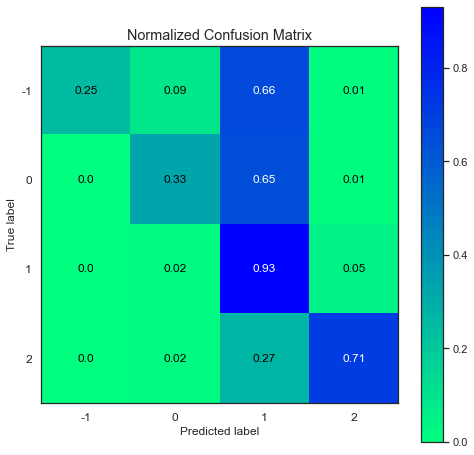

In [74]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

### Support Vector Classifier
A Support Vector Classifier is a discriminative classifier formally defined by a separating hyperplane. When labeled training data is passed to the model, also known as supervised learning, the algorithm outputs an optimal hyperplane which categorizes new data.

In [75]:
modelstart = time.time()
svc = SVC(gamma = 0.8, C = 10, random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_val)
svc_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred, y_val))
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
report = classification_report(y_val, y_pred, output_dict=True)
results = pd.DataFrame(report).transpose()
# results.to_csv("svc_report.csv")
results
# model_save_path = "svc_model.pkl"
# with open(model_save_path,'wb') as file:
#     pickle.dump(svc,file)

Accuracy 0.786346396965866
Model Runtime: 99.50 seconds


,precision,recall,f1-score,support
-1,0.780488,0.507937,0.615385,126.000000
0,0.623377,0.428571,0.507937,224.000000
1,0.797059,0.908380,0.849086,895.000000
2,0.831288,0.804154,0.817496,337.000000
accuracy,0.786346,0.786346,0.786346,0.786346
macro avg,0.758053,0.662261,0.697476,1582.000000
weighted avg,0.778438,0.786346,0.775439,1582.000000


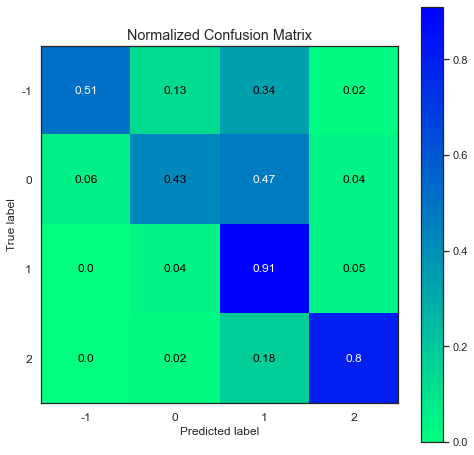

In [76]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

### Linear SVC
The objective of a Linear Support Vector Classifier is to return a "best fit" hyperplane that categorises the data. It is similar to SVC with the kernal parameter set to ’linear’, but it is implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and can scale better to large numbers of samples.

In [77]:
modelstart = time.time() 
linsvc = LinearSVC()
linsvc.fit(X_train, y_train)
y_pred = linsvc.predict(X_val)
linsvc_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred, y_val))
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
report = classification_report(y_val, y_pred, output_dict=True)
results = pd.DataFrame(report).transpose()
# results.to_csv("linsvc_report.csv")
results
# model_save_path = "linsvc_model.pkl"
# with open(model_save_path,'wb') as file:
#     pickle.dump(linsvc,file)

Accuracy 0.7572692793931732
Model Runtime: 0.55 seconds


,precision,recall,f1-score,support
-1,0.652174,0.476190,0.550459,126.000000
0,0.566474,0.437500,0.493703,224.000000
1,0.800826,0.867039,0.832618,895.000000
2,0.758621,0.783383,0.770803,337.000000
accuracy,0.757269,0.757269,0.757269,0.757269
macro avg,0.694524,0.641028,0.661896,1582.000000
weighted avg,0.746813,0.757269,0.748989,1582.000000


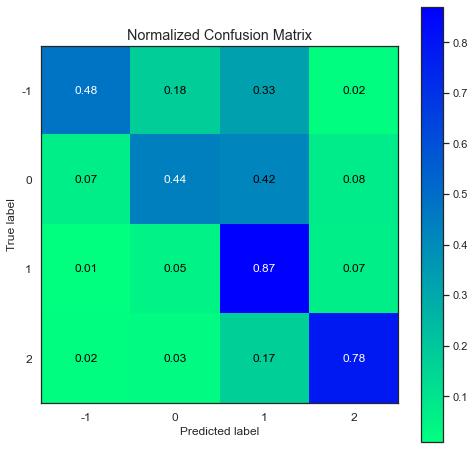

In [78]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

### K Neighbours Classifier
The K Neighbours Classifier is a classifier that implements the k-nearest neighbours vote. In classification, the output is a class membership. An object is classified by a plurality vote of its neighbours, with the object being assigned to the class most common among its k-nearest neighbours.

In [79]:
modelstart = time.time()
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(X_train, y_train)
y_pred = kn.predict(X_val)
kn_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
report = classification_report(y_val, y_pred, output_dict=True)
results = pd.DataFrame(report).transpose()
# results.to_csv("kn_report.csv")
results
# model_save_path = "kn_model.pkl"
# with open(model_save_path,'wb') as file:
#     pickle.dump(kn,file)

accuracy 0.42098609355246525
Model Runtime: 0.80 seconds


,precision,recall,f1-score,support
-1,0.742857,0.206349,0.322981,126.000000
0,0.198104,0.933036,0.326818,224.000000
1,0.910299,0.306145,0.458194,895.000000
2,0.821990,0.465875,0.594697,337.000000
accuracy,0.420986,0.420986,0.420986,0.420986
macro avg,0.668312,0.477851,0.425673,1582.000000
weighted avg,0.777309,0.420986,0.457901,1582.000000


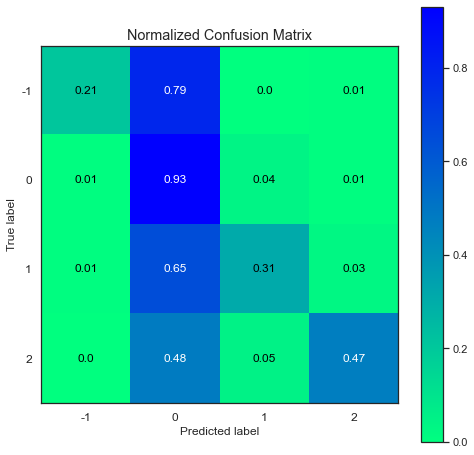

In [80]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

### Decision Tree Classifier
Decision tree machine learning models represent data by partitioning it into different sections based on questions asked of independent variables in the data. Training data is placed at the root node and is then partitioned into smaller subsets which form the 'branches' of the tree.

In [81]:
modelstart = time.time()
dt = DecisionTreeClassifier(random_state=42)    
dt.fit(X_train, y_train)
y_pred = dt.predict(X_val)
dt_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
report = classification_report(y_val, y_pred, output_dict=True)
pd.DataFrame(report).transpose()

accuracy 0.6245259165613148
Model Runtime: 3.35 seconds


,precision,recall,f1-score,support
-1,0.390000,0.309524,0.345133,126.000000
0,0.337778,0.339286,0.338530,224.000000
1,0.732162,0.745251,0.738649,895.000000
2,0.595376,0.611276,0.603221,337.000000
accuracy,0.624526,0.624526,0.624526,0.624526
macro avg,0.513829,0.501334,0.506383,1582.000000
weighted avg,0.619930,0.624526,0.621804,1582.000000


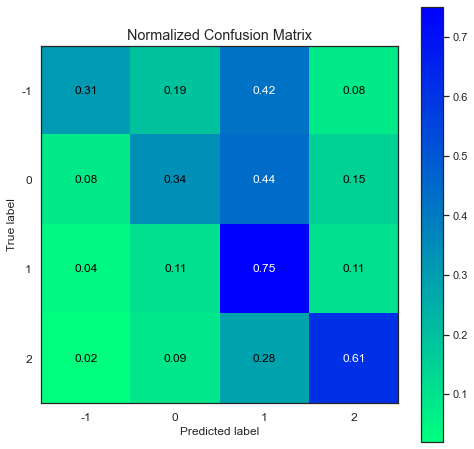

In [82]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

### AdaBoost Classifier
The AdaBoost classifier is an iterative ensemble method that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset. In the second step, the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [83]:
modelstart = time.time()
ad = AdaBoostClassifier(random_state=42)
ad.fit(X_train, y_train)
y_pred = ad.predict(X_val)
ad_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
report = classification_report(y_val, y_pred, output_dict=True)
pd.DataFrame(report).transpose()

accuracy 0.6434892541087232
Model Runtime: 2.38 seconds


,precision,recall,f1-score,support
-1,0.566667,0.269841,0.365591,126.000000
0,0.466165,0.276786,0.347339,224.000000
1,0.698351,0.804469,0.747664,895.000000
2,0.564246,0.599407,0.581295,337.000000
accuracy,0.643489,0.643489,0.643489,0.643489
macro avg,0.573857,0.487626,0.510472,1582.000000
weighted avg,0.626420,0.643489,0.625110,1582.000000


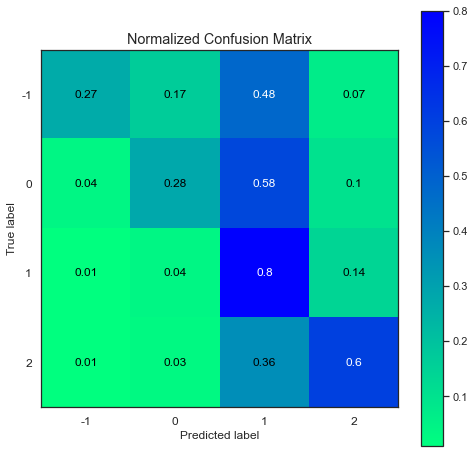

In [84]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

<a id="evaluation"></a>
## 7. Performance Evaluation

### Performance Metrics of Best Models

We built and tested eight different classification models can compare their performance using a statistical measure known as the weighted F1 score, which takes into account the proportions of each class fed into the model. This is a weighted average of the precision and recall of the model and is the measure that will be used to test the accuracy of our Kaggle output. 

#### Precision

When it predicts "True", how often is it correct? 

$$ Precision = \frac{TP}{TP \space + FP} = \frac{TP}{Total \space Predicted \space Positive} $$

#### Recall

When the outcome is actually "True", how often do we predict it as such?

$$ Recall = \frac{TP}{TP \space + FN} = \frac{TP}{Total \space Actual \space Positive}$$

#### F1 Score

Weighted average of precision and recall. 

$$F_1 = 2 \times \frac {Precision \space \times \space Recall }{Precision \space + \space Recall }$$

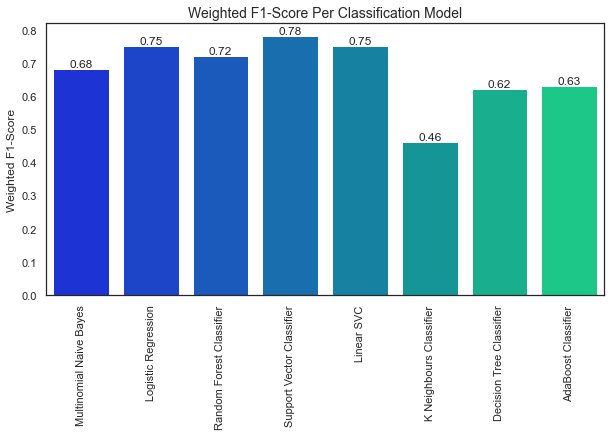

In [85]:
# Compare Weighted F1-Scores Between Models
fig,axis = plt.subplots(figsize=(10, 5))
rmse_x = ['Multinomial Naive Bayes','Logistic Regression','Random Forest Classifier','Support Vector Classifier','Linear SVC','K Neighbours Classifier','Decision Tree Classifier','AdaBoost Classifier']
rmse_y = [multinb_f1,logreg_f1,rf_f1,svc_f1,linsvc_f1,kn_f1,dt_f1,ad_f1]
ax = sns.barplot(x=rmse_x, y=rmse_y,palette='winter')
plt.title('Weighted F1-Score Per Classification Model',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Weighted F1-Score')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),2), fontsize=12, ha="center", va='bottom')
    
plt.show()

From the performance metrics, we see that the **Support Vector Classifier** performed the best on our validation set, closely followed by the **Linear SVC** and **Logistic Regression** models. The K Neighbours Classifier significantly performed the worst, which may be due to the k value that was selected for the model. To ensure that we get a robust measure of classifier performance, we will apply cross validation and hyperparameter tuning on the top three performing models.

### Hyperparameter Tuning of Best Models
**Cross validation** is a technique used to test the accuracy of a model's prediction on unseen data (validation sets). This is important because it can assist in picking up issues such as over/underfitting and selection bias. We used the K-fold technique to perform cross validation. 

**Hyperparameter** tuning is the process by which a set of ideal hyperparameters are chosen for a model. A hyperparameter is a parameter for which the value is set manually and tuned to control the algorithm's learning process.

**Logistic Regression**

In [86]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [87]:
param_grid = {'C': [1000], #[100,1000]
              'max_iter': [10], #[10,100]
              'multi_class': ['ovr'], #['ovr', 'multinomial']
              'random_state': [42],
              'solver': ['saga']} #['saga','lbfgs']
grid_LR = GridSearchCV(LogisticRegression(), param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
grid_LR.fit(X_train, y_train)
y_pred = grid_LR.predict(X_val)
print("Best parameters:")
print(grid_LR.best_params_)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred))

Best parameters:
{'C': 1000, 'max_iter': 10, 'multi_class': 'ovr', 'random_state': 42, 'solver': 'saga'}
accuracy 0.7610619469026548
              precision    recall  f1-score   support

          -1       0.66      0.50      0.57       126
           0       0.59      0.46      0.51       224
           1       0.80      0.87      0.83       895
           2       0.76      0.77      0.77       337

    accuracy                           0.76      1582
   macro avg       0.70      0.65      0.67      1582
weighted avg       0.75      0.76      0.75      1582



**Linear SVC**

In [88]:
LinearSVC().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [89]:
param_grid = {'C': [100],#[0.1,1,10,100,1000]
              'max_iter': [10], #[10,100]
              'multi_class' : ['ovr'], #['crammer_singer', 'ovr']
              'random_state': [42]} 
grid_LSVC = GridSearchCV(LinearSVC(), param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
grid_LSVC.fit(X_train, y_train)
y_pred = grid_LSVC.predict(X_val)
print(grid_LSVC.best_params_)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred))

{'C': 100, 'max_iter': 10, 'multi_class': 'ovr', 'random_state': 42}
accuracy 0.7383059418457648
              precision    recall  f1-score   support

          -1       0.67      0.39      0.49       126
           0       0.53      0.44      0.48       224
           1       0.79      0.84      0.82       895
           2       0.71      0.80      0.75       337

    accuracy                           0.74      1582
   macro avg       0.68      0.62      0.64      1582
weighted avg       0.73      0.74      0.73      1582



**Support Vector Classifier**

In [90]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [91]:
param_grid = {'C': [10],#[0.1,1,10,100,1000]
              'gamma': [0.8], #[0.8,1]
              'kernel': ['rbf'], #['linear','rbf']
              'random_state': [42]} 
grid_SVC = GridSearchCV(SVC(), param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
grid_SVC.fit(X_train, y_train)
y_pred = grid_SVC.predict(X_val)
print(grid_SVC.best_params_)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred))

{'C': 10, 'gamma': 0.8, 'kernel': 'rbf', 'random_state': 42}
accuracy 0.786346396965866
              precision    recall  f1-score   support

          -1       0.78      0.51      0.62       126
           0       0.62      0.43      0.51       224
           1       0.80      0.91      0.85       895
           2       0.83      0.80      0.82       337

    accuracy                           0.79      1582
   macro avg       0.76      0.66      0.70      1582
weighted avg       0.78      0.79      0.78      1582



<a id="analysis"></a>
## 8. Model Analysis
We used a TF-IDF vectorizer to compute a weight for each word token by its level of importance and vectorize it and we used a radial basis function support vector classifier (SVC) to train our model. After a bit of hyperparamater tuning, we found the following paramaters to work well: {'C': 10, 'gamma': 0.8, 'kernel': 'rbf', 'random_state': 42}. An aggressive max_df removes the most common occuring words in the corpus. This improves our model as by looking at bag of words in our EDA, most frequent words have very little semantic meaning. A token pattern of alphanumeric words performed best and since the average tweet has around 17 words, an n-gram of 1 to 2 performs best in capturing semantic meaning. The SVC paramaters were chosen because the radial basis function performs better than a Linear SVC at splitting up the areas in which the different semantic lies. This is possibly due to the fact that the classification is not binary.

### Performance Metrics

In [92]:
y_pred = svc.predict(X_val)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred))

accuracy 0.786346396965866
              precision    recall  f1-score   support

          -1       0.78      0.51      0.62       126
           0       0.62      0.43      0.51       224
           1       0.80      0.91      0.85       895
           2       0.83      0.80      0.82       337

    accuracy                           0.79      1582
   macro avg       0.76      0.66      0.70      1582
weighted avg       0.78      0.79      0.78      1582



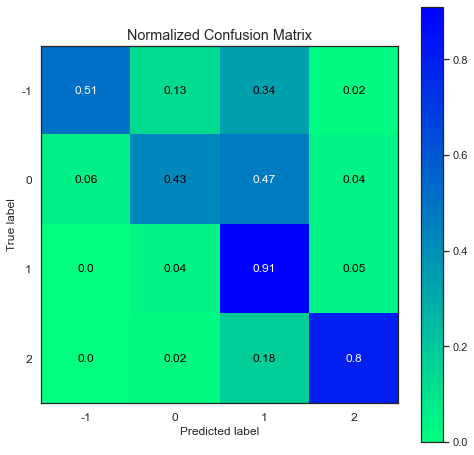

In [93]:
con_mat = plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

### ROC Curves and AUC
ROC curves show the trade-off between sensitivity and specificity of a classification model. Classifiers that produce curves closer to the top-left corner indicate a better performance. The area under the ROC curve (AUC), is equivalent to the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance. High AUC values are a general measure of good predictive accuracy.

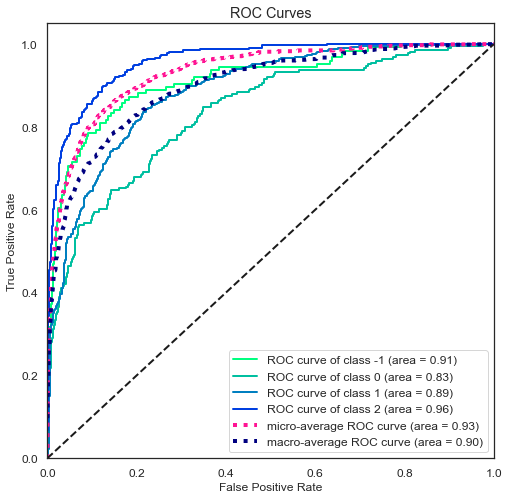

In [94]:
# If model doesn't take "probability=True" as an argument (e.g. LinearSVC)
ovr =  OneVsRestClassifier(SVC(random_state=42,class_weight='balanced'))

y_train_binarized = label_binarize(y_train, classes=[-1, 0, 1, 2])
y_val_binarized = label_binarize(y_val, classes=[-1, 0, 1, 2])
n_classes = 4

ovr.fit(X_train, y_train_binarized)

# decision_function predicts a “soft” score for each sample in relation to each class, 
# rather than the “hard” categorical prediction produced by predict. Its input is 
# usually only some observed data, X.
y_probas = ovr.decision_function(X_val)

plot_roc(y_val, y_probas,figsize=(8,8),cmap='winter_r')
plt.show()

### Results

In [95]:
# Make prediction on test data
X = train_data['final']
y = train_data['sentiment']
X_test = test_data['final']

X = list(X.apply(' '.join))
X_test = list(X_test.apply(' '.join))

vectorizer = TfidfVectorizer(sublinear_tf=True, smooth_idf = True, max_df = 0.3, min_df = 5, ngram_range = (1, 2))
vectorizer.fit(X)

X = vectorizer.transform(X)
X_test = vectorizer.transform(X_test)

svc = SVC(gamma=0.8, C=10, random_state=42)
svc.fit(X, y)
y_test = svc.predict(X_test)

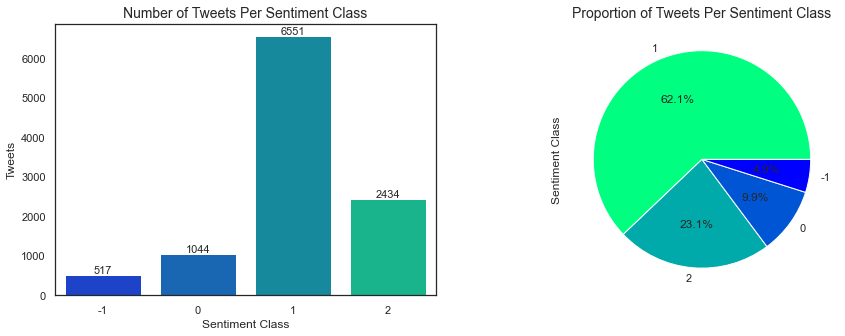

In [96]:
# Number of Tweets Per Sentiment Class
fig, axis = plt.subplots(ncols=2, figsize=(15, 5))

ax = sns.countplot(y_test,palette='winter',ax=axis[0])
axis[0].set_title('Number of Tweets Per Sentiment Class',fontsize=14)
axis[0].set_xlabel('Sentiment Class')
axis[0].set_ylabel('Tweets')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')

results = pd.DataFrame({"tweetid":test_data['tweetid'],"sentiment": y_test})
results['sentiment'].value_counts().plot.pie(autopct='%1.1f%%',colormap='winter_r',ax=axis[1])
axis[1].set_title('Proportion of Tweets Per Sentiment Class',fontsize=14)
axis[1].set_ylabel('Sentiment Class')
    
plt.show()

<a id="conclusion"></a>
## 9. Conclusion

In this project, we succeeded in building a supervised machine learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data. Our top performing model has a weighted F1 score of 0.78, based on our validation set, and the results from our testing set are in line with what was observed in the training set. We think that it is possible that the number of Pro tweets is related to the fact that "97% or more of actively publishing climate scientists agree: climate-warming trends over the past century are extremely likely due to human activities." (Nasa)

**Impact investing** is an emerging field that refers to investments made into companies and organisations with the intention to generate measurable social or environmental impact alongside financial return. Many companies are built around lessening one’s environmental impact or carbon footprint and they offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. These companies would like to determine how people perceive climate change and whether or not they believe it is a real threat. Our model provides a valuable solution to this problem and can add to their market research efforts in gauging how their product or service may be received. It gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories, thus increasing their insights and informing future marketing strategies.

From our exploratory data analysis, we can draw some marketing-related insights. For maximum reach in marketing campaigns that target a specific group of people that have a certain stance with regard to climate change, a marketing team can consider the following:
* Neutral class
  - Tweets should have a positive Vader sentiment
* Positive class
  - Tweets with a positive Vader sentiment will have less reach than negative or neutral tweets. Marketing should focus on negative (highest priority) or neutral Vader sentiment when tweeting. 
* Negative class
  - Less clear
* News related class
  - News agencies should consider writing their tweets with a positve Vader sentiment to have greatest reach and retweets. 
  
The rise of impact investment has caused companies to focus on generating positive social and environmental impact in addition to financial returns. It would assist companies' (that can) to ally their brand and products with the Pro Climate change movement. Pro Climate change tweets tens to have a wider reach than tother classes. Not only is it an ethical stance but it has potential to increase exposure of the brand on Twitter. Their tweets could be used to add their voice to the fight against global warming and thus be expressed as a negative sentiment or possibly nuetral. This could maximize their reach even further and other introduces other considerations, such as financial rewards due to carbon taxes.

<a id="save"></a>
## 10. Save Output

In [22]:
# Create Kaggle Submission File
results = pd.DataFrame({"tweetid":test_data['tweetid'],"sentiment": y_test})
results.to_csv("Team_RM5_submission.csv", index=False)

In [ ]:
print("\nResults\nConfusion matrix \n {}".format(confusion_matrix(y_val, y_pred)))
f1 = f1_score(y_val, y_pred,average="macro")
precision = precision_score(y_val, y_pred,average="macro")
recall = recall_score(y_val, y_pred,average="macro")
params = {"random_state": 42,
          "model_type": "svc",
          "param_grid": "str(param_grid)",
          "stratify": True,
          }
metrics = {"f1": f1,
           "recall": recall,
           "precision": precision
           }

experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.end()

In [ ]:
experiment.display()

[Back to top ↑](#top)

<sub>*Team name credit: Ridha (& Freud's mom)</sub>